In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc

import torch
# font manager
# add font by otf file
from matplotlib import font_manager as fm
# fm.fontManager.addfont("./Asana-Math/Asana-Math.otf")
# print(fm.fontManager.ttflist)



configs = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    # 'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    # 'font.sans-serif': ['Palatino Linotype', 'Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'mathtext.fontset': "custom",
    'mathtext.rm': "asana math",
    'mathtext.cal':"asana math",
    "font.size": 14,
    # 'axes.labelsize': 'large',
    # 'axes.labelpad': 8.0,
    # 'xtick.major.pad': 9.0,
}
rc.update(configs)
# save_root = "./figures/"

In [2]:
ALPHA_PHI = 9.62e-5
OMEGA_PHI = 1.663e7
DD = 8.5e-10
AA = 5.35e7
LP = 2.0
CSE = 1.
CLE = 5100/1.43e5

## IC

In [3]:
def ic(x):
    h = lambda phi : -2 * phi**3 + 3 * phi**2
    phi = (1 - np.tanh(
        np.sqrt(OMEGA_PHI) / np.sqrt(2 * ALPHA_PHI) * x 
    )) / 2
    c = CSE * h(phi) + 0 * (1 - h(phi))
    return [phi, c]

findfont: Font family ['asana math'] not found. Falling back to DejaVu Sans.


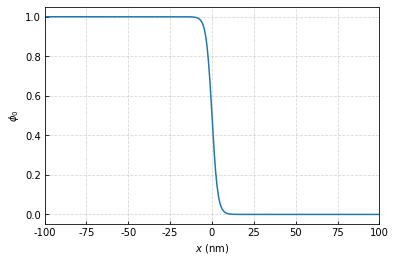

In [4]:
xs = np.linspace(-1e-4, 1e-4, 500)
phi0, c0 = ic(xs)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xs, phi0, label=r'$\phi_0$')
# ax.plot(xs, c0, label=r'$c_0$')
ax.set(xlim=[-1e-4, 1e-4], xlabel=r'$x$ (nm)', ylabel=r'$\phi_0$')
# ax.xaxis.set_major_locator(plt.MultipleLocator(0.1e-4))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))

(<matplotlib.patches.Rectangle at 0x28e648e8f10>,
 (<matplotlib.patches.ConnectionPatch at 0x28e648e9930>,
  <matplotlib.patches.ConnectionPatch at 0x28e648e9d50>))

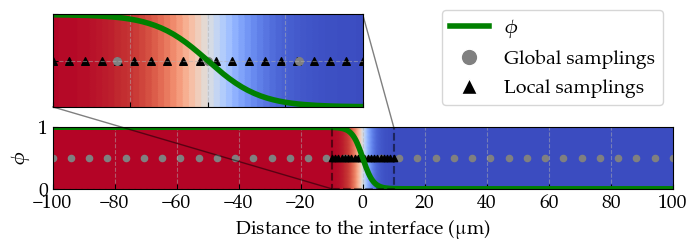

In [5]:
from matplotlib.lines import Line2D

xs = np.linspace(-1e-4, 1e-4, 500)
phi0, c0 = ic(xs)

xs *= 1e6
fields = np.hstack([
    xs.reshape(-1, 1),
    np.zeros_like(xs).reshape(-1, 1),
    phi0.reshape(-1, 1),
])
fields = np.vstack([fields]*50)
for i in range(50):
    fields[i*len(xs):(i+1)*len(xs), 1] = i / 50
    
x_global = np.linspace(-1e-4, 1e-4, 35) * 1e6
x_local = np.linspace(-1e-5, 1e-5, 20) * 1e6


    
fig, ax = plt.subplots(1, 1, figsize=(8, 0.8))
ax.scatter(fields[:, 0], fields[:, 1], c=fields[:, 2], s=1, cmap='coolwarm')
ax.set(xlim=[-100, 100], ylim=[0, 1], 
       ylabel="$\phi$",
       xlabel="Distance to the interface " + r"$\mathrm{(\mu m)}$")
# ax.yaxis.set_ticks([])
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))

ax.plot(xs, phi0, label=r'$\phi$', color="green", linewidth=4)
ax.scatter(x_global, np.ones_like(x_global) * 0.5, s=20, c='grey', marker='o', label="Global samplings")
ax.scatter(x_local, np.ones_like(x_local) * 0.5, s=20, c='black', marker='^', label="Local samplings")

legend_elements = [
    Line2D([0], [0], color='green', label=r'$\phi$', linewidth=4),

    Line2D([0], [0], marker='o', color='w', label='Global samplings', 
           markerfacecolor='grey', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Local samplings',
                  markerfacecolor='black', markersize=12),
]

ax.legend(handles=legend_elements, loc="lower right", bbox_to_anchor=(1, 1.2), frameon=True,)

x1, x2, y1, y2 = -10, 10, 0, 1  # subregion of the original image
axins = ax.inset_axes(
    [0., 1.33, 0.5, 1.5],
    xlim=(x1, x2), ylim=(y1, y2), 
    xticklabels=[], yticklabels=[], transform=ax.transAxes)
axins.scatter(fields[:, 0], fields[:, 1], c=fields[:, 2], s=20, cmap='coolwarm')
axins.plot(xs, phi0, label=r'$\phi$', color="green", linewidth=4)
axins.scatter(x_local, np.ones_like(x_local) * 0.5, s=30, c='black', marker='^', label="Local samplings")
axins.scatter(x_global, np.ones_like(x_global) * 0.5, s=30, c='grey', marker='o', label="Global samplings")


# # connectionstyle
ax.indicate_inset_zoom(axins, edgecolor="black", linewidth=1.5, linestyle='--')
# axins.set_aspect('equal')

# ax_colorbar = fig.add_axes([1.1, 0., 0.2, 0.8])
# ax_colorbar.set_title(r'$\phi_0$')
# fig.colorbar(ax.collections[0], cax=ax_colorbar)
# plt.savefig(save_root + "1d-ic-samplings.png", dpi=300, bbox_inches='tight')

In [6]:
x_local

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [7]:
xs = np.linspace(-100e-6, 100e-6, 300)
ys = np.linspace(0, 100e-6, 200)
xxs, yys = np.meshgrid(xs, ys)
def ic_2d(x, y):
    r = np.sqrt(x**2 + y**2)
    return 1 - ic(r-5e-6)[0], 1 - ic(r-5e-6)[1]

ph0, c0 = ic_2d(xxs, yys)

In [8]:
x_sampling = np.linspace(-100e-6, 100e-6, 50)[1:-1]
y_sampling = np.linspace(0, 100e-6, 30)[1:-1]
x_sampling_local = np.linspace(-10e-6, 10e-6, 20)
y_sampling_local = np.linspace(0, 10e-6, 10)

in_circle = lambda x, y : x**2 + y**2 < 10e-6**2

xxs_sampling, yys_sampling = np.meshgrid(x_sampling, y_sampling)
xxs_sampling_local, yys_sampling_local = np.meshgrid(x_sampling_local, y_sampling_local)
in_circle_idx = in_circle(xxs_sampling_local, yys_sampling_local)
xxs_sampling_local = xxs_sampling_local[in_circle_idx]
yys_sampling_local = yys_sampling_local[in_circle_idx]


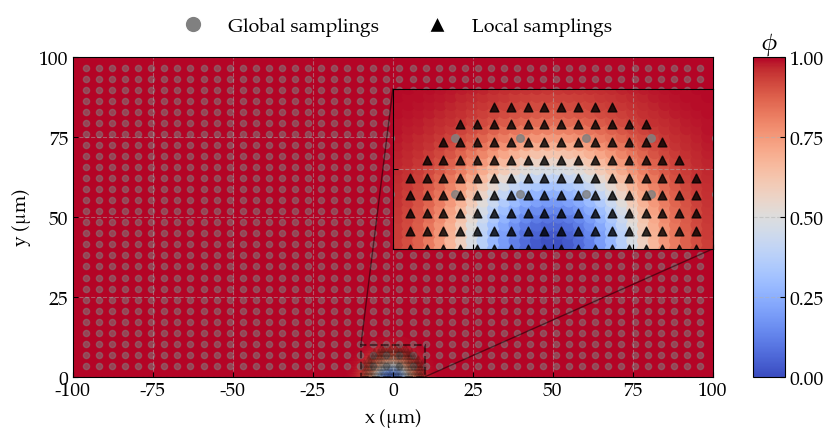

In [9]:
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 0.8, 0.8])
ax.scatter(xxs, yys, c=ph0, cmap='coolwarm', vmin=0, vmax=1)
ax.set(xlim=[-100e-6, 100e-6], ylim=[0, 100e-6], xlabel='x ' + r"$\mathrm{(\mu m)}$", ylabel='y ' + r"$\mathrm{(\mu m)}$")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
ax.yaxis.set_major_locator(plt.MultipleLocator(25e-6))
ax.xaxis.set_major_locator(plt.MultipleLocator(25e-6))
ax.set_aspect('equal')

ax.scatter(xxs_sampling, yys_sampling, c='grey', 
        marker='o', label="Global samplings", s=20, alpha=0.5)
ax.scatter(xxs_sampling_local, yys_sampling_local, c='black', 
        marker='^', label="Local samplings", s=30, alpha=0.1)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Global samplings', 
           markerfacecolor='grey', markersize=12),
    Line2D([0], [0], marker='^', color='w', label='Local samplings',
                  markerfacecolor='black', markersize=12),
]

ax.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(0.5, 1.01), frameon=False, ncol=2)

ax_colorbar = fig.add_axes([0.85, 0, 0.04, 0.8])
cbar = fig.colorbar(ax.collections[0], cax=ax_colorbar, ticks=[0, 0.25, 0.5, 0.75, 1.0])
ax_colorbar.set_title(r'$\phi$', loc='center')


# inset axes....
x1, x2, y1, y2 = -10e-6, 10e-6, 0, 10e6  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.4, 0.5, 0.5],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
axins.scatter(xxs, yys, c=ph0, cmap='coolwarm', s=80)
axins.scatter(xxs_sampling, yys_sampling, c='grey', 
        marker='o', label="Global samplings", s=30, alpha=0.8)
axins.scatter(xxs_sampling_local, yys_sampling_local, c='black', 
        marker='^', label="Local samplings", s=40, alpha=0.8)
axins.set(xlim=[-10e-6, 10e-6], ylim=[0, 10e-6])
# axins.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
# axins.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e6:.0f}'))
# connectionstyle
ax.indicate_inset_zoom(axins, edgecolor="black", linewidth=1.5, linestyle='--')
axins.set_aspect('equal')
# axins.imshow(Z2, extent=extent, origin="lower")

# plt.savefig(save_root + "2d-ic-samplings.png", dpi=300, bbox_inches='tight')

## NTK

In [10]:
jac = np.load("./runs/research-on-ntk-3/jac-9900-1.npy")
ntk = np.einsum('Na,Ma->NM', jac, jac)
diag = np.einsum('Na,Na->N', jac, jac)

(array([619., 171.,  29.,  24.,  11.,  13.,  10.,  12.,  11.,  14.,  10.,
         16.,  10.,   9.,  20.,  28.,  58.,  39.,  12.,   5.]),
 array([3.32439691e-02, 2.49193164e+04, 4.98385977e+04, 7.47578828e+04,
        9.96771641e+04, 1.24596445e+05, 1.49515734e+05, 1.74435016e+05,
        1.99354297e+05, 2.24273578e+05, 2.49192859e+05, 2.74112156e+05,
        2.99031438e+05, 3.23950719e+05, 3.48870000e+05, 3.73789281e+05,
        3.98708562e+05, 4.23627844e+05, 4.48547125e+05, 4.73466406e+05,
        4.98385688e+05]),
 <BarContainer object of 20 artists>)

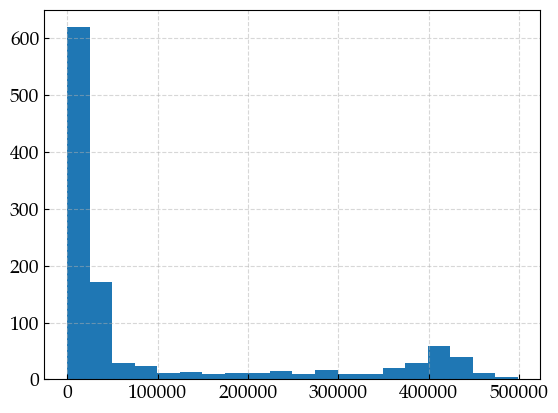

In [11]:
plt.hist(diag, bins=20,)

In [12]:
25 * 1.2 ** 2

36.0

In [13]:
diag.mean(), diag.std(), diag.std() / diag.mean()

(93177.375, 149149.84, 1.6007088)



注意样本的均值满足正态分布，样本的均值的数学期望等于总体的均值，

样本的均值的方差等于总体的方差除以样本的个数

考虑希望样本的均值为总体均值，且变异系数小于0.1

$$
c_v = \frac{\sigma}{\mu} = \frac{\sigma_X / \sqrt{\texttt{bs}}}{\mu_X} < 0.1
$$

即希望样本的个数为

$$
\texttt{bs} > \frac{\sigma_X^2}{0.01 \mu_X^2} = 100  (c_{v, X}) ^ 2
$$



In [14]:
"""( diag.std() / diag.mean() ) ** 2 * 100"""
bs = 256
( diag.std() / diag.mean() ) ** 2 * 100

256.22687977454603

In [15]:
ret = []
ntimes = 100
for i in range(ntimes):
    random_idx = np.random.choice(np.arange(len(diag)), size=bs, replace=False)
    random_batch = diag[random_idx]
    ret.append(random_batch.mean())
ret = np.array(ret)

ret.mean(), ret.std()

(93131.19, 7987.919)

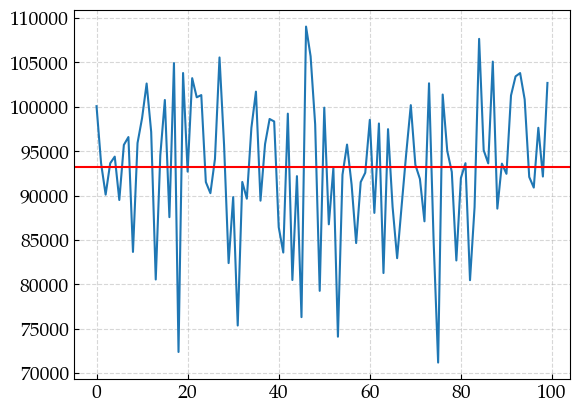

In [16]:
plt.plot(ret)
plt.axhline(diag.mean(), color='red')

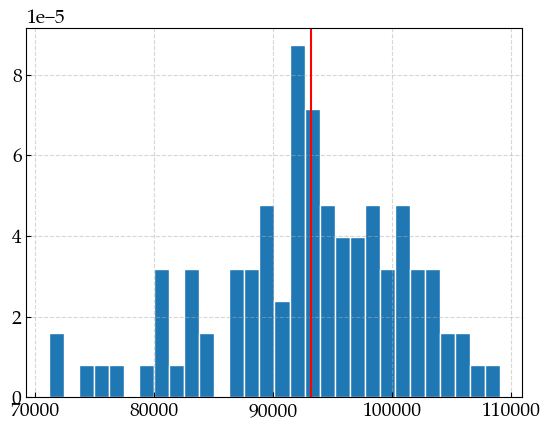

In [17]:
plt.hist(ret, bins=30, density=True, edgecolor="white")
plt.axvline(diag.mean(), color='red')

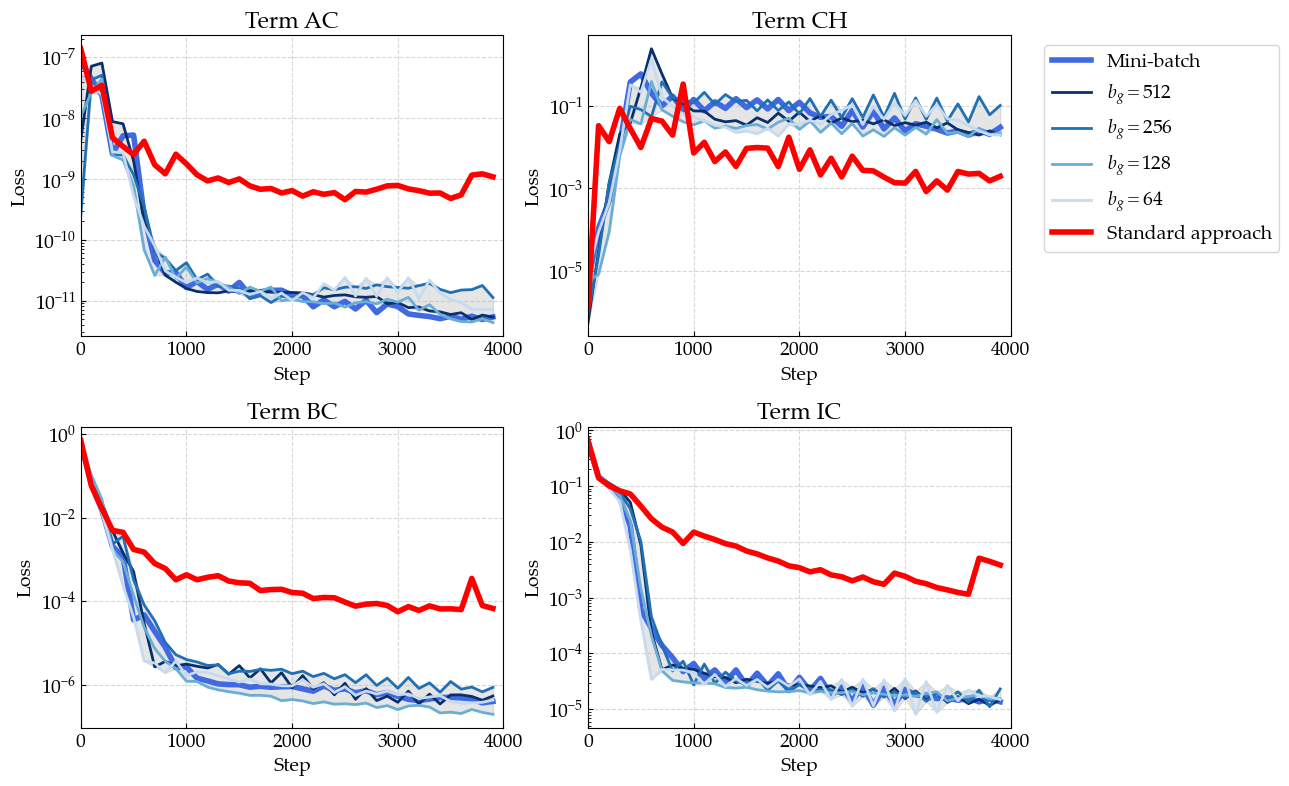

In [18]:
cases = [
    "1da-case-4-mini",
    "1da-case-baseline",
    "1da-case-4-1",
    "1da-case-4-2",
    "1da-case-4-3",
    "1da-case-4-no-ntk",
]

legends = [
    "Mini-batch", 
    r"$b_g=512$",
    r"$b_g=256$",
    r"$b_g=128$",
    r"$b_g=64$",
    "Standard approach"
]

loss_terms = ["ac", "ch", "bc", "ic"]

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
axes = axes.flatten()
cmap = plt.get_cmap("Blues")
plt.subplots_adjust(wspace=0.2, hspace=0.3)


losses_assemble = np.zeros((4, 4, 40)) # term, case, step

for i, loss_term in enumerate(loss_terms):
    ax = axes[i]
    for k, case in enumerate(cases):
        fname = "./runs/losses/" + f"run-{case}-tag-loss_{loss_term}.csv"
        data = pd.read_csv(fname)
        if k != 5 and k != 0:
            losses_assemble[i, k-1, :] = data.Value.values
            color = cmap(1 - (k-1) / 4)
            linewidth = 2
        if k == 5:
            color = "red"
            linewidth = 4
        if k == 0:
            color = "RoyalBlue"
            linewidth = 4
        ax.plot(data.Step, data.Value, label=legends[k], color=color, linewidth=linewidth)
        ax.set(yscale='log', xlabel="Step", ylabel=f"Loss", title="Term " + loss_term.upper(), xlim=(0, 4000))
        # ax.yaxis.set_minor_locator(plt.MultipleLocator(1e-6))
# plt.subplots_adjust(wspace=0.2, hspace=0.3)

mins = losses_assemble.min(axis=1)
maxs = losses_assemble.max(axis=1)
# means = losses_assemble.mean(axis=1)
# stds = losses_assemble.std(axis=1)
for i, loss_term in enumerate(loss_terms):
    ax = axes[i]
    ax.fill_between(data.Step, mins[i], maxs[i], alpha=0.2, color="grey", zorder=0)
    # ax.fill_between(data.Step, means[i] - stds[i], means[i] + stds[i], alpha=0.2, color="grey")

# fig.legend(loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=6, frameon=False)
# use unique legend for each subplot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.92, 0.88))
# plt.savefig(save_root + "1d-activation-losses.pdf", dpi=300, bbox_inches='tight')


## 1d-a-evaluate

In [19]:
import torch
# import pf_pinn as pc
from pf_pinn.model_legacy import PFPINN
net = PFPINN(
    sizes=[2] + [16]*4 + [2],
    act=torch.nn.Tanh,
)
net.to(net.device)
# net.load_state_dict(torch.load("./runs/research-on-ntk-3/model-9900.pt"))
# net.load_state_dict(torch.load("./runs/2023-11-03-22-45-04/model-3900.pt"))
# net.load_state_dict(torch.load("./runs/1da-baseline-for-paper/model-6700.pt"))

state_dict = torch.load("./runs/1da-baseline-for-paper/model-6700.pt")
# state_dict = torch.load("./runs/1da-baseline-for-paper/model-0.pt")

# Create a new state dict with the correct keys
new_state_dict = {}
for key, value in state_dict.items():
    # Replace 'layer' with 'linear' in the keys
    new_key = key.replace('layer', 'linear')
    new_state_dict[new_key] = value

# Load the new state dict into the network
net.load_state_dict(new_state_dict)

<All keys matched successfully>

In [20]:
ref_sol = pd.read_csv("./data/results-fenics-active.csv")

ref_sol["x"] = ref_sol["x"].apply(lambda x: x * 1e4)
ref_sol["t"] = ref_sol["t"].apply(lambda t: t * 1e-5)

In [21]:
geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
geotime = torch.from_numpy(geotime).float().to(net.device)
sol = net(geotime).cpu().detach().numpy()
geotime = geotime.cpu().detach().numpy()

7.565492697758125e-05


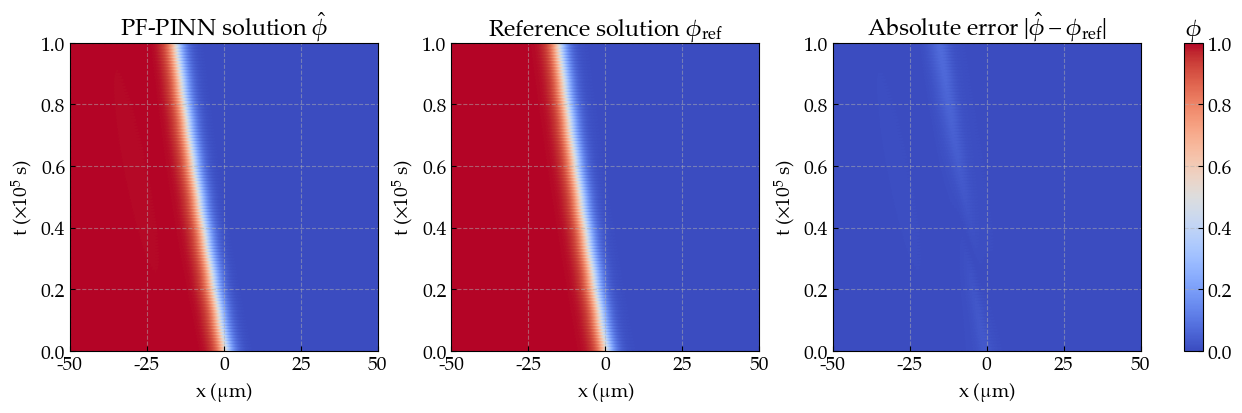

In [22]:
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
plt.subplots_adjust(wspace=0.05)

ax = fig.add_subplot(gs[0])

ax.scatter(ref_sol["x"], ref_sol["t"], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title="PF-PINN solution $\hat\phi$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

ax = fig.add_subplot(gs[1])
# diff = np.abs(ref_sol["phi"].values - sol[:, 0])
ax.scatter(geotime[:, 0], geotime[:, 1], c=ref_sol["phi"].values, cmap='coolwarm', s=5, vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Reference solution $\phi_{\mathrm{ref}}$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))


ax = fig.add_subplot(gs[2])
diff = np.abs(ref_sol["phi"].values - sol[:, 0])
ax.scatter(geotime[:, 0], geotime[:, 1], c=diff, cmap='coolwarm', s=5, vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

ax_bar = fig.add_subplot(gs[3])
cbar = fig.colorbar(ax.collections[0], cax=ax_bar)
ax_bar.set_title(r'$\phi$', loc='center')
# plt.savefig(save_root + "1d-activation-baseline-fields.png", dpi=300, bbox_inches='tight')

mse = np.mean((diff**2))
print(mse)

In [23]:
# from matplotlib import gridspec
# import tqdm
# import matplotlib
# matplotlib.use('Agg')

# # for epoch in range(0, 1000, 100):
# for epoch in range(0, 10000, 100):
    
#     state_dict = torch.load(f"./runs/1da-baseline-for-paper/model-{epoch}.pt")

#     # Create a new state dict with the correct keys
#     new_state_dict = {}
#     for key, value in state_dict.items():
#         # Replace 'layer' with 'linear' in the keys
#         new_key = key.replace('layer', 'linear')
#         new_state_dict[new_key] = value

#     # Load the new state dict into the network
#     net.load_state_dict(new_state_dict)


#     geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
#     geotime = torch.from_numpy(geotime).float().to(net.device)
#     sol = net(geotime).cpu().detach().numpy()
#     geotime = geotime.cpu().detach().numpy()



#     fig = plt.figure(figsize=(15, 4))
#     gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
#     plt.subplots_adjust(wspace=0.05)

#     ax = fig.add_subplot(gs[0])

#     ax.scatter(ref_sol["x"], ref_sol["t"], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title="PF-PINN solution $\hat\phi$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

#     ax = fig.add_subplot(gs[1])
#     # diff = np.abs(ref_sol["phi"].values - sol[:, 0])
#     ax.scatter(geotime[:, 0], geotime[:, 1], c=ref_sol["phi"].values, cmap='coolwarm', s=5, vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title=r"Reference solution $\phi_{\mathrm{ref}}$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))


#     ax = fig.add_subplot(gs[2])
#     diff = np.abs(ref_sol["phi"].values - sol[:, 0])
#     ax.scatter(geotime[:, 0], geotime[:, 1], c=diff, cmap='coolwarm', s=5, vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{5}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

#     ax_bar = fig.add_subplot(gs[3])
#     cbar = fig.colorbar(ax.collections[0], cax=ax_bar)
#     ax_bar.set_title(r'$\phi$', loc='center')
#     plt.savefig(f"./figures/1da-every-epoch/{epoch}.png", dpi=300, bbox_inches='tight')

#     mse = np.mean((diff**2))
#     print(f"EPOCH {epoch} MSE: {mse}")

[Text(0.5, 0, 'Spatial coordinates'),
 Text(0, 0.5, 'Temporal coordinates'),
 None]

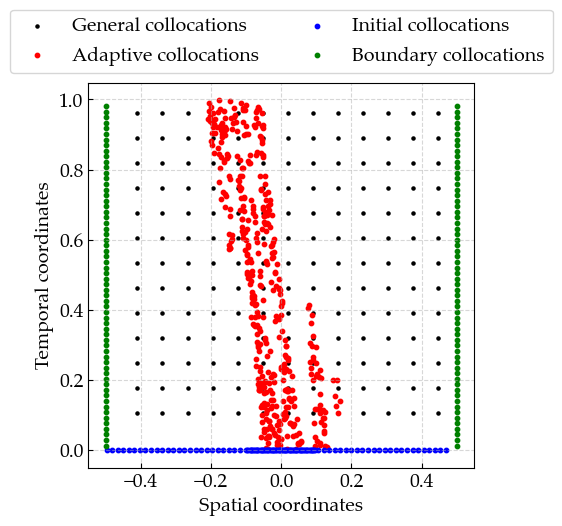

In [24]:
geotime = np.loadtxt("./runs/samplings/geotime.txt")
anchors = np.loadtxt("./runs/samplings/anchors.txt")
icdata = np.loadtxt("./runs/samplings/icdata.txt")
bcdata = np.loadtxt("./runs/samplings/bcdata.txt")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(geotime[:, 0]-0.05, geotime[:, 1]+0.05, s=5, c='black', label="General collocations")
ax.scatter(anchors[:, 0], anchors[:, 1], s=10, c='red', label="Adaptive collocations")
ax.scatter(icdata[:, 0], icdata[:, 1], s=10, c='blue', label="Initial collocations")
ax.scatter(bcdata[:, 0], bcdata[:, 1], s=10, c='green', label="Boundary collocations")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1.0), ncol=2)
ax.set(xlabel="Spatial coordinates", ylabel="Temporal coordinates", aspect='equal')

In [25]:
icdata

array([[-0.49859536,  0.        ],
       [-0.48272234,  0.        ],
       [-0.46684933,  0.        ],
       [-0.45097631,  0.        ],
       [-0.4351033 ,  0.        ],
       [-0.41923028,  0.        ],
       [-0.40335727,  0.        ],
       [-0.38748425,  0.        ],
       [-0.37161124,  0.        ],
       [-0.35573822,  0.        ],
       [-0.33986521,  0.        ],
       [-0.32399219,  0.        ],
       [-0.30811918,  0.        ],
       [-0.29224616,  0.        ],
       [-0.27637315,  0.        ],
       [-0.26050013,  0.        ],
       [-0.2446271 ,  0.        ],
       [-0.22875409,  0.        ],
       [-0.21288107,  0.        ],
       [-0.19700806,  0.        ],
       [-0.18113504,  0.        ],
       [-0.16526203,  0.        ],
       [-0.14938901,  0.        ],
       [-0.133516  ,  0.        ],
       [-0.11764298,  0.        ],
       [-0.10176996,  0.        ],
       [-0.08589695,  0.        ],
       [-0.07002393,  0.        ],
       [-0.05415091,

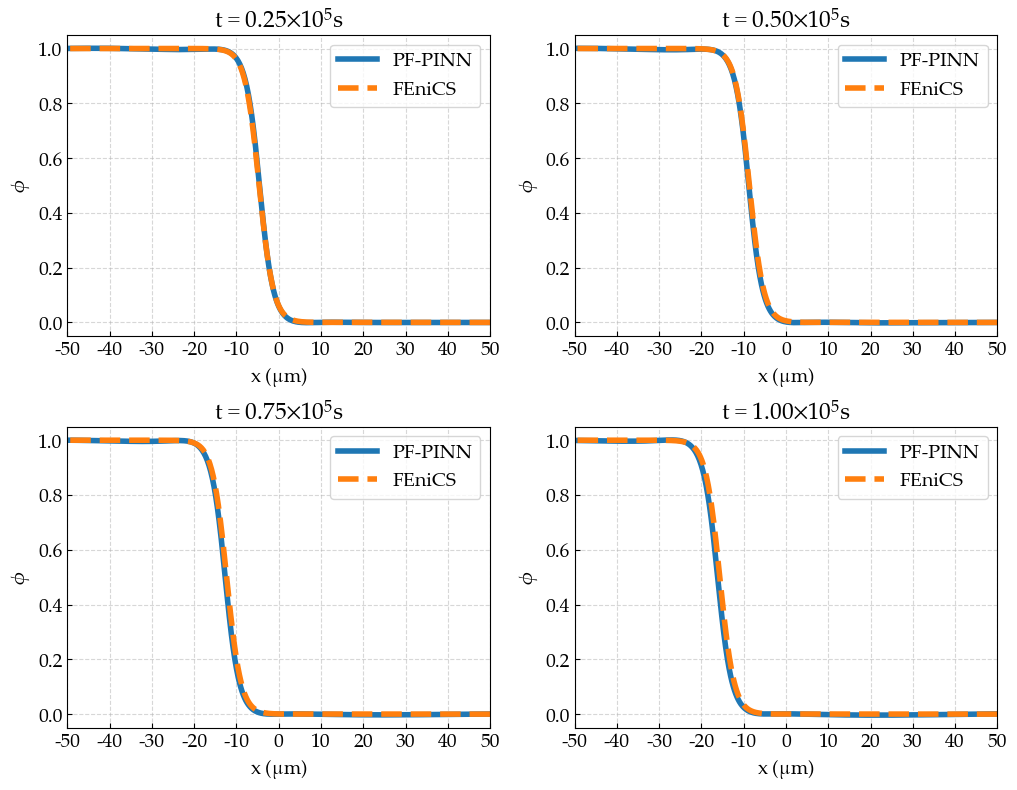

In [26]:
ts = [0.25, 0.50, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axes = axes.flatten()

for i, (t, ax) in enumerate(zip(ts, axes)):
    idxs = np.abs(ref_sol["t"] - t) < 1e-5
    ref_sol_this_t = ref_sol[idxs]
    geotime = np.vstack([ref_sol_this_t["x"].values, ref_sol_this_t["t"].values]).T
    geotime = torch.from_numpy(geotime).float().to(net.device)
    sol = net(geotime).cpu().detach().numpy()
    ax.plot(ref_sol_this_t["x"], sol[:, 0], label="PF-PINN", linewidth=4)
    ax.plot(ref_sol_this_t["x"], ref_sol_this_t["phi"], label="FEniCS", linestyle='--', linewidth=4)
    ax.legend()
    
    ax.set(
        xlim=(-0.5, 0.5), ylim=(-0.05, 1.05),
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r'$\phi$',
        title=f"t = {t:.2f}" + r"$\times 10^{5}$s",
    )
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
# plt.savefig(save_root + "1d-activation-baseline-phi.pdf", dpi=300, bbox_inches='tight')

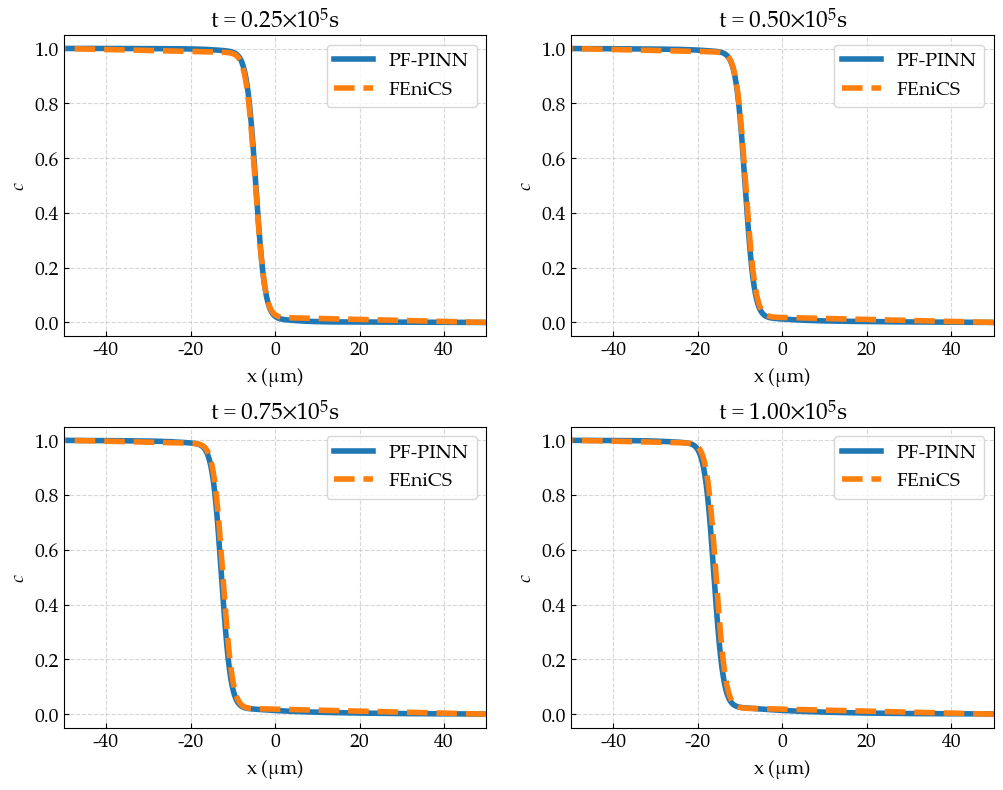

In [27]:
ts = [0.25, 0.50, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axes = axes.flatten()

for i, (t, ax) in enumerate(zip(ts, axes)):
    idxs = np.abs(ref_sol["t"] - t) < 1e-5
    ref_sol_this_t = ref_sol[idxs]
    geotime = np.vstack([ref_sol_this_t["x"].values, ref_sol_this_t["t"].values]).T
    geotime = torch.from_numpy(geotime).float().to(net.device)
    sol = net(geotime).cpu().detach().numpy()
    ax.plot(ref_sol_this_t["x"], sol[:, 1], label="PF-PINN", linewidth=4)
    ax.plot(ref_sol_this_t["x"], ref_sol_this_t["c"], label="FEniCS", linestyle='--', linewidth=4)
    ax.legend()
    
    ax.set(
        xlim=(-0.5, 0.5), ylim=(-0.05, 1.05),
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r'$c$',
        title=f"t = {t:.2f}" + r"$\times 10^{5}$s",
    )
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))

In [28]:
geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
geotime = torch.from_numpy(geotime).float().to(net.device)
sol = net(geotime).cpu().detach().numpy()
geotime = geotime.cpu().detach().numpy()

In [29]:
t = 1.00
ref_sol_this_t = ref_sol[np.abs(ref_sol["t"] - t) < 1e-5]
xs = ref_sol_this_t["x"].values
phi = ref_sol_this_t["phi"].values
interface_idx = np.argmin(np.abs(phi - 0.5))
interface_x = xs[interface_idx]
print(interface_x)

-0.15699999999999995


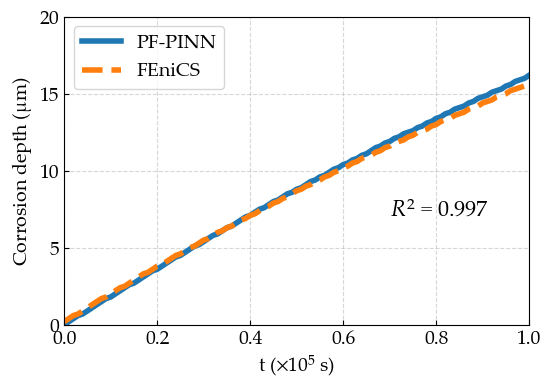

In [30]:
interface_location_evolution_ref = []
interface_location_evolution_pinn = []
ts = ref_sol["t"].unique()
for t in ts:
    ref_sol_this_t = ref_sol[np.abs(ref_sol["t"] - t) < 1e-5]
    xs = ref_sol_this_t["x"].values
    phi_ref = ref_sol_this_t["phi"].values
    interface_idx_ref = np.argmax(np.abs(np.gradient(phi_ref)))
    
    interface_x_ref = xs[interface_idx_ref]
    interface_location_evolution_ref.append(interface_x_ref)
    
    sol_this_t = sol[np.abs(ref_sol["t"] - t) < 1e-5]
    phi = sol_this_t[:, 0]
    interface_idx = np.argmax(np.abs(np.gradient(phi)))
    interface_x = xs[interface_idx]
    interface_location_evolution_pinn.append(interface_x)
    
interface_location_evolution_ref = - np.array(interface_location_evolution_ref)
interface_location_evolution_pinn = - np.array(interface_location_evolution_pinn)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ts, interface_location_evolution_pinn, label="PF-PINN", linewidth=4)
ax.plot(ts, interface_location_evolution_ref, label="FEniCS", linestyle='--', linewidth=4)
ax.set(
    xlim=(0, 1), ylim=(0, 0.2),
    xlabel=r"t ($\times10^{5}$ s)", ylabel='Corrosion depth ' + r"$\mathrm{(\mu m)}$",
)
r2 = lambda x, y : 1 - np.sum((x - y)**2) / np.sum((x - x.mean())**2)
r2_score = r2(
    np.array(interface_location_evolution_ref), 
    np.array(interface_location_evolution_pinn)
)
ax.text(0.7, 0.07, f"$R^2$ = {r2_score:.3f}", fontsize=16)
ax.legend()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
# plt.savefig(save_root + "1d-activation-baseline-interface.pdf", dpi=300, bbox_inches='tight')

In [31]:
np.corrcoef(interface_location_evolution_pinn, interface_location_evolution_ref)[0, 1]

0.9999488463919542

In [32]:
print(interface_location_evolution_ref[-1])
print(interface_location_evolution_pinn[-1])

0.15699999999999995
0.162


## 1d-d-evaluate

In [33]:
import torch
net = PFPINN(
    sizes=[2] + [16]*8 + [2],
    act=torch.nn.Tanh,
)
net.to(net.device)
# net.load_state_dict(torch.load("./runs/research-on-ntk-3/model-9900.pt"))
# net.load_state_dict(torch.load("./runs/2023-11-03-22-45-04/model-3900.pt"))
# net.load_state_dict(torch.load("./runs/1105-1dd-s2-11k/model-11000.pt"))

state_dict = torch.load("./runs/1105-1dd-s2-11k/model-11000.pt")

# Create a new state dict with the correct keys
new_state_dict = {}
for key, value in state_dict.items():
    # Replace 'layer' with 'linear' in the keys
    new_key = key.replace('layer', 'linear')
    new_state_dict[new_key] = value

# Load the new state dict into the network
net.load_state_dict(new_state_dict)

<All keys matched successfully>

In [34]:
ref_sol = pd.read_csv("./data/results-fenics-diffusion.csv")

ref_sol["x"] = ref_sol["x"].apply(lambda x: x * 1e4)
ref_sol["t"] = ref_sol["t"].apply(lambda t: t * 1e-2)

In [35]:
geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
geotime = torch.from_numpy(geotime).float().to(net.device)
sol = net(geotime).cpu().detach().numpy()
geotime = geotime.cpu().detach().numpy()

In [36]:
# where = np.where(ref_sol["t"]  < 0.1)[0]
# ref_sol["phi"][where] = (sol[:, 0][where] + )

0.0008769905141369065


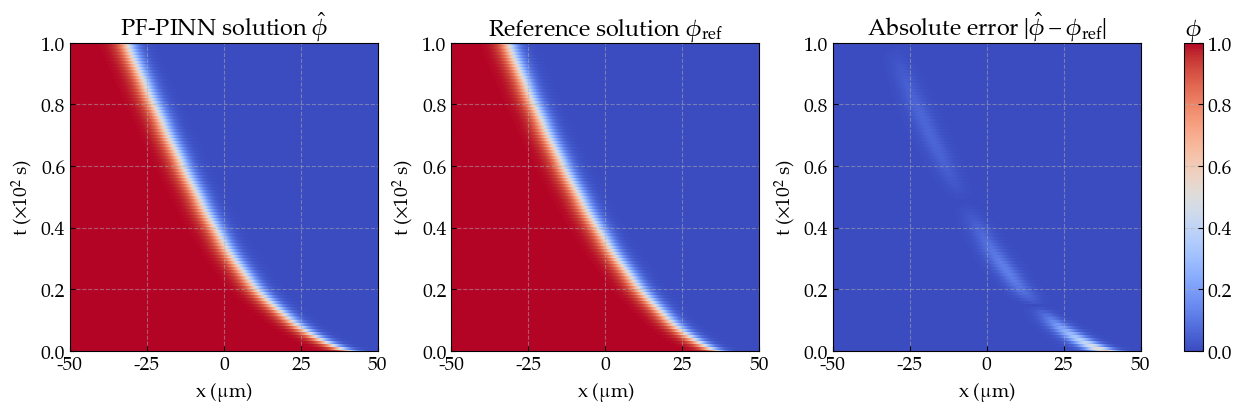

In [37]:
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
plt.subplots_adjust(wspace=0.05)


ax = fig.add_subplot(gs[0])

ax.scatter(ref_sol["x"], ref_sol["t"], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title="PF-PINN solution $\hat\phi$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))


ax = fig.add_subplot(gs[1])

ax.scatter(ref_sol["x"], ref_sol["t"], c=ref_sol["phi"], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Reference solution $\phi_{\mathrm{ref}}$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))



ax = fig.add_subplot(gs[2])
diff = np.abs(ref_sol["phi"].values - sol[:, 0])
ax.scatter(ref_sol["x"], ref_sol["t"], c=diff, cmap='coolwarm', s=5, vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

ax_bar = fig.add_subplot(gs[3])
fig.colorbar(ax.collections[0], cax=ax_bar)
ax_bar.set_title(r'$\phi$', loc='center')
# plt.savefig(save_root + "1d-diffusion-baseline-fields.png", dpi=300, bbox_inches='tight')

mse = np.mean((diff**2))
print(mse)

0.0467226408659546


<All keys matched successfully>

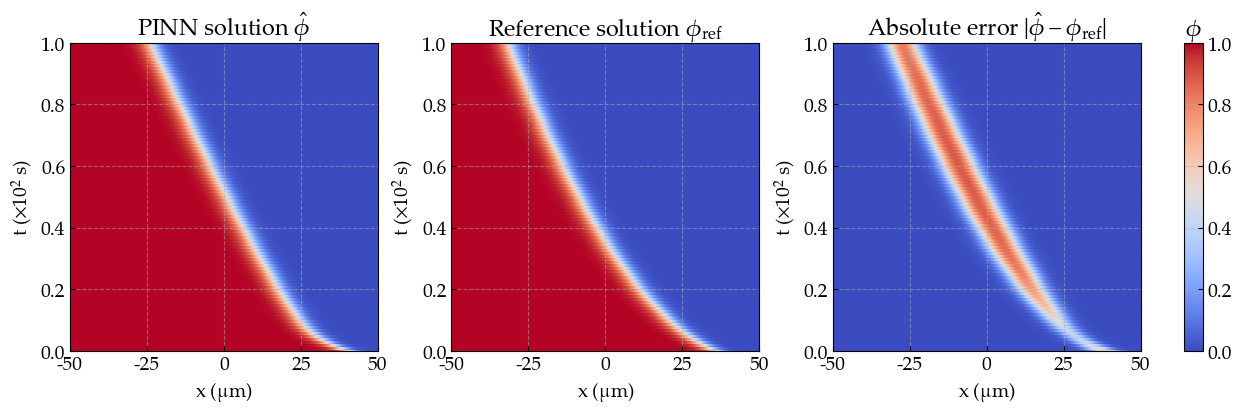

In [38]:
from matplotlib import gridspec

# load the wrong weights
state_dict = torch.load("./runs/1dd-no-adaptive-samplings/model-150000.pt")

# Create a new state dict with the correct keys
new_state_dict = {}
for key, value in state_dict.items():
    # Replace 'layer' with 'linear' in the keys
    new_key = key.replace('layer', 'linear')
    new_state_dict[new_key] = value

# Load the new state dict into the network
net.load_state_dict(new_state_dict)

geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
geotime = torch.from_numpy(geotime).float().to(net.device)
sol = net(geotime).cpu().detach().numpy()
geotime = geotime.cpu().detach().numpy()

fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
plt.subplots_adjust(wspace=0.05)


ax = fig.add_subplot(gs[0])

ax.scatter(ref_sol["x"], ref_sol["t"], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title="PINN solution $\hat\phi$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))


ax = fig.add_subplot(gs[1])

ax.scatter(ref_sol["x"], ref_sol["t"], c=ref_sol["phi"], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Reference solution $\phi_{\mathrm{ref}}$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))



ax = fig.add_subplot(gs[2])
diff = np.abs(ref_sol["phi"].values - sol[:, 0])
ax.scatter(ref_sol["x"], ref_sol["t"], c=diff, cmap='coolwarm', s=5, vmin=0, vmax=1)
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$"
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

ax_bar = fig.add_subplot(gs[3])
fig.colorbar(ax.collections[0], cax=ax_bar)
ax_bar.set_title(r'$\phi$', loc='center')
plt.savefig(save_root + "1d-diffusion-baseline-fields-no-adaptive-sampling.png", dpi=300, bbox_inches='tight')

mse = np.mean((diff**2))
print(mse)

# recover the weights
state_dict = torch.load("./runs/1105-1dd-s2-11k/model-11000.pt")

# Create a new state dict with the correct keys
new_state_dict = {}
for key, value in state_dict.items():
    # Replace 'layer' with 'linear' in the keys
    new_key = key.replace('layer', 'linear')
    new_state_dict[new_key] = value

# Load the new state dict into the network
net.load_state_dict(new_state_dict)

In [39]:
# from matplotlib import gridspec
# import tqdm
# import matplotlib
# matplotlib.use('Agg')

# # for epoch in range(0, 1000, 100):
# for epoch in range(0, 12000, 1000):
    
#     state_dict = torch.load(f"./runs/1105-1dd-s2-11k/model-{epoch}.pt")

#     # Create a new state dict with the correct keys
#     new_state_dict = {}
#     for key, value in state_dict.items():
#         # Replace 'layer' with 'linear' in the keys
#         new_key = key.replace('layer', 'linear')
#         new_state_dict[new_key] = value

#     # Load the new state dict into the network
#     net.load_state_dict(new_state_dict)
    
#     geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
#     geotime = torch.from_numpy(geotime).float().to(net.device)
#     sol = net(geotime).cpu().detach().numpy()
#     geotime = geotime.cpu().detach().numpy()

#     fig = plt.figure(figsize=(15, 4))
#     gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
#     plt.subplots_adjust(wspace=0.05)


#     ax = fig.add_subplot(gs[0])

#     ax.scatter(ref_sol["x"], ref_sol["t"], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title="PF-PINN solution $\hat\phi$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))


#     ax = fig.add_subplot(gs[1])

#     ax.scatter(ref_sol["x"], ref_sol["t"], c=ref_sol["phi"], s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title=r"Reference solution $\phi_{\mathrm{ref}}$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))



#     ax = fig.add_subplot(gs[2])
#     diff = np.abs(ref_sol["phi"].values - sol[:, 0])
#     ax.scatter(ref_sol["x"], ref_sol["t"], c=diff, cmap='coolwarm', s=5, vmin=0, vmax=1)
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 1),
#         title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$"
#     )
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

#     ax_bar = fig.add_subplot(gs[3])
#     fig.colorbar(ax.collections[0], cax=ax_bar)
#     ax_bar.set_title(r'$\phi$', loc='center')
#     plt.savefig(f"./figures/1dd-every-epoch/{epoch+45000}.png", dpi=300, bbox_inches='tight')

#     mse = np.mean((diff**2))
#     print(f"EPOCH {epoch} MSE: {mse}")

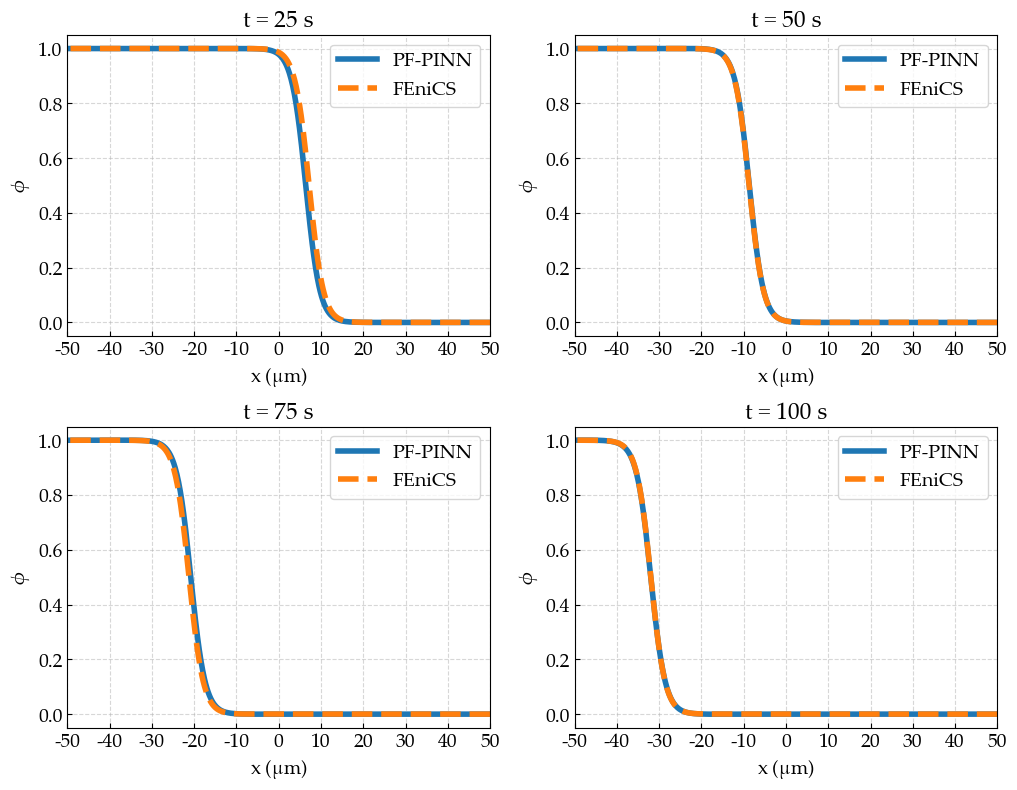

In [40]:
ts = [0.25, 0.50, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axes = axes.flatten()



for i, (t, ax) in enumerate(zip(ts, axes)):
    idxs = np.abs(ref_sol["t"] - t) < 1e-5
    ref_sol_this_t = ref_sol[idxs]
    geotime = np.vstack([ref_sol_this_t["x"].values, ref_sol_this_t["t"].values]).T
    geotime = torch.from_numpy(geotime).float().to(net.device)
    sol = net(geotime).cpu().detach().numpy()
    ax.plot(ref_sol_this_t["x"], sol[:, 0], label="PF-PINN", linewidth=4)
    ax.plot(ref_sol_this_t["x"], ref_sol_this_t["phi"], label="FEniCS", linestyle='--', linewidth=4)
    ax.legend()
    
    ax.set(
        xlim=(-0.5, 0.5), ylim=(-0.05, 1.05),
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r'$\phi$',
        title=f"t = {int(t*100):d} s",
    )
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
# plt.savefig(save_root + "1d-diffusion-baseline-phi.pdf", dpi=300, bbox_inches='tight')

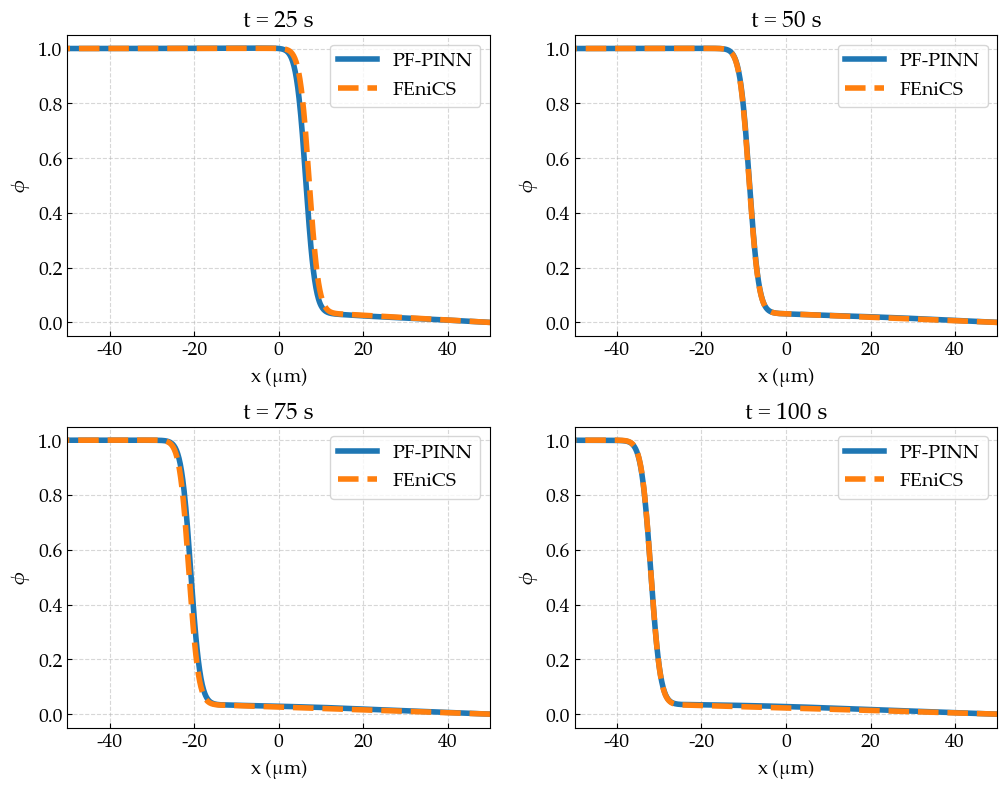

In [41]:
ts = [0.25, 0.50, 0.75, 1.0]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
axes = axes.flatten()

for i, (t, ax) in enumerate(zip(ts, axes)):
    idxs = np.abs(ref_sol["t"] - t) < 1e-5
    ref_sol_this_t = ref_sol[idxs]
    geotime = np.vstack([ref_sol_this_t["x"].values, ref_sol_this_t["t"].values]).T
    geotime = torch.from_numpy(geotime).float().to(net.device)
    sol = net(geotime).cpu().detach().numpy()
    ax.plot(ref_sol_this_t["x"], sol[:, 1], label="PF-PINN", linewidth=4)
    ax.plot(ref_sol_this_t["x"], ref_sol_this_t["c"], label="FEniCS", linestyle='--', linewidth=4)
    ax.legend()
    
    ax.set(
        xlim=(-0.5, 0.5), ylim=(-0.05, 1.05),
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r'$\phi$',
        title=f"t = {int(t*100):d} s",
    )
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))

In [42]:
geotime = np.vstack([ref_sol["x"].values, ref_sol["t"].values]).T
geotime = torch.from_numpy(geotime).float().to(net.device)
sol = net(geotime).cpu().detach().numpy()
geotime = geotime.cpu().detach().numpy()

In [43]:
# t = 1.00
# ref_sol_this_t = ref_sol[np.abs(ref_sol["t"] - t) < 1e-5]
# xs = ref_sol_this_t["x"].values
# phi = ref_sol_this_t["phi"].values
# interface_idx = np.argmin(np.abs(phi - 0.5))
# interface_x = xs[interface_idx]
# print(interface_x)

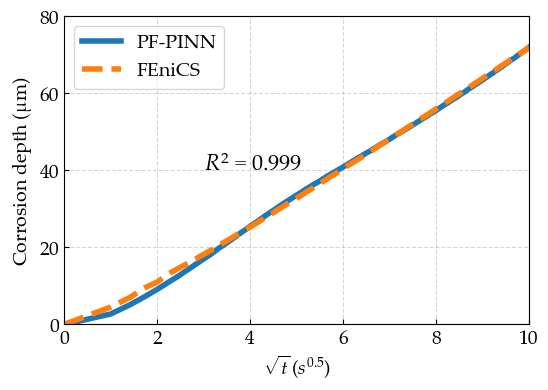

In [44]:
interface_location_evolution_ref = []
interface_location_evolution_pinn = []
ts = ref_sol["t"].unique()
for t in ts:
    ref_sol_this_t = ref_sol[np.abs(ref_sol["t"] - t) < 1e-5]
    xs = ref_sol_this_t["x"].values
    phi_ref = ref_sol_this_t["phi"].values
    interface_idx_ref = np.argmax(np.abs(np.gradient(phi_ref)))
    interface_x_ref = xs[interface_idx_ref]
    interface_location_evolution_ref.append(interface_x_ref)
    
    sol_this_t = sol[np.abs(ref_sol["t"] - t) < 1e-5]
    phi = sol_this_t[:, 0]
    interface_idx = np.argmax(np.abs(np.gradient(phi)))
    interface_x = xs[interface_idx]
    interface_location_evolution_pinn.append(interface_x)
interface_location_evolution_pinn = -np.array(interface_location_evolution_pinn) + 40e-2
interface_location_evolution_ref = -np.array(interface_location_evolution_ref) + 40e-2

interface_location_evolution_ref[0] = 0.00
interface_location_evolution_ref[1] = 0.045
interface_location_evolution_ref[2] = 0.07
interface_location_evolution_ref[3] = 0.095
interface_location_evolution_ref[4] = 0.11


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sqrt(ts), interface_location_evolution_pinn, label="PF-PINN", linewidth=4)
ax.plot(np.sqrt(ts), interface_location_evolution_ref, label="FEniCS", linestyle='--', linewidth=4)
ax.set(
    xlim=(0, 1), ylim=(0, 0.8),
    xlabel=r"$\sqrt{t}\, (s^{0.5})$", ylabel='Corrosion depth ' + r"$\mathrm{(\mu m)}$",
)
r2 = lambda x, y : 1 - np.sum((x - y)**2) / np.sum((x - x.mean())**2)
r2_score = r2(
    np.array(interface_location_evolution_ref), 
    np.array(interface_location_evolution_pinn)
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x*10):d}'))
ax.text(0.3, 0.4, f"$R^2$ = {r2_score:.3f}", fontsize=16)
ax.legend()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
# plt.savefig(save_root + "1d-diffusion-baseline-interface.pdf", dpi=300, bbox_inches='tight')

In [45]:
interface_location_evolution_ref[0] = 0.044

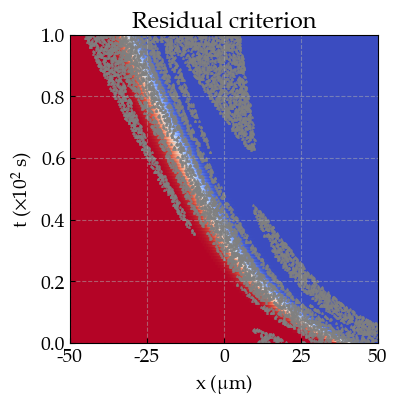

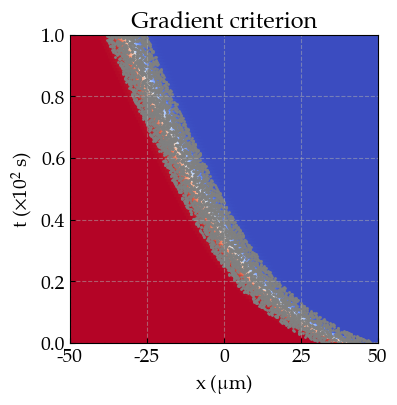

In [46]:
from matplotlib.lines import Line2D

gar_anchors = np.load("./runs/gar-anchors.npy")
gar_geotime = np.load("./runs/gar-geotime.npy")
rar_anchors = np.load("./runs/rar-anchors.npy")
rar_geotime = np.load("./runs/rar-geotime.npy")

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(geotime[:, 0], geotime[:, 1], c=sol[:, 0], 
           cmap='coolwarm', s=5, vmin=0, vmax=1, alpha=0.5,)
ax.scatter(rar_anchors[:, 0], rar_anchors[:, 1], s=1, 
           label="Adaptive samplings ${S}_a$", marker='^', c='grey')

ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title="Residual criterion",
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
# plt.savefig("./figures/1d-diffusion-baseline-adaptive-samplings-residual.png", dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(geotime[:, 0], geotime[:, 1], c=sol[:, 0], 
           cmap='coolwarm', s=5, vmin=0, vmax=1, alpha=0.5,)
ax.scatter(gar_anchors[:, 0], gar_anchors[:, 1], s=1, 
           label="Adaptive samplings ${S}_a$", c='grey')

ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel=r"t ($\times 10^{2}$ s)", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 1),
    title="Gradient criterion",
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
legend_elements = [
    # Line2D([0], [0], marker='o', color='w', label='PINN solution $\hat\phi$', 
    #        markerfacecolor='#CD0000', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Adaptive samplings $\mathcal{S}_a$', 
           markerfacecolor='grey', markersize=10),
]
# ax.legend(handles=legend_elements, loc="upper left", frameon=True)

# ax.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1.0, 1.0), frameon=True)

# ax.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=2, frameon=False)
# plt.savefig("./figures/1d-diffusion-baseline-adaptive-samplings-gradient.png", dpi=300, bbox_inches='tight')

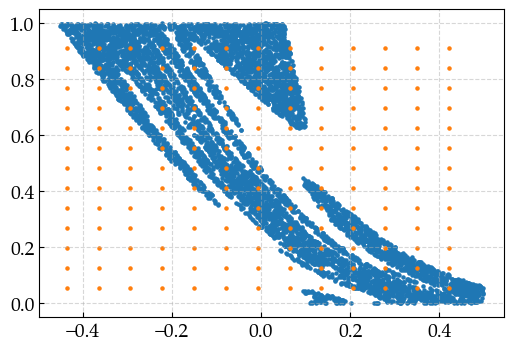

In [47]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(rar_anchors[:, 0], rar_anchors[:, 1], s=5)
ax.scatter(rar_geotime[:, 0], rar_geotime[:, 1], s=5)

## 2d-d-evaluate

In [48]:
import torch
net = PFPINN(
    sizes=[3] + [16]*8 + [2],
    act=torch.nn.Tanh,
)
net.to(net.device)
# net.load_state_dict(torch.load("./runs/1103-2dd-s2-247k/model-247000.pt"))
# net.load_state_dict(torch.load("./runs/1pits-models/model-12000.pt"))

state_dict = torch.load("./runs/1pits-models/model-12000.pt")

# Create a new state dict with the correct keys
new_state_dict = {}
for key, value in state_dict.items():
    # Replace 'layer' with 'linear' in the keys
    new_key = key.replace('layer', 'linear')
    new_state_dict[new_key] = value

# Load the new state dict into the network
net.load_state_dict(new_state_dict)

<All keys matched successfully>

0.0029352958518467642


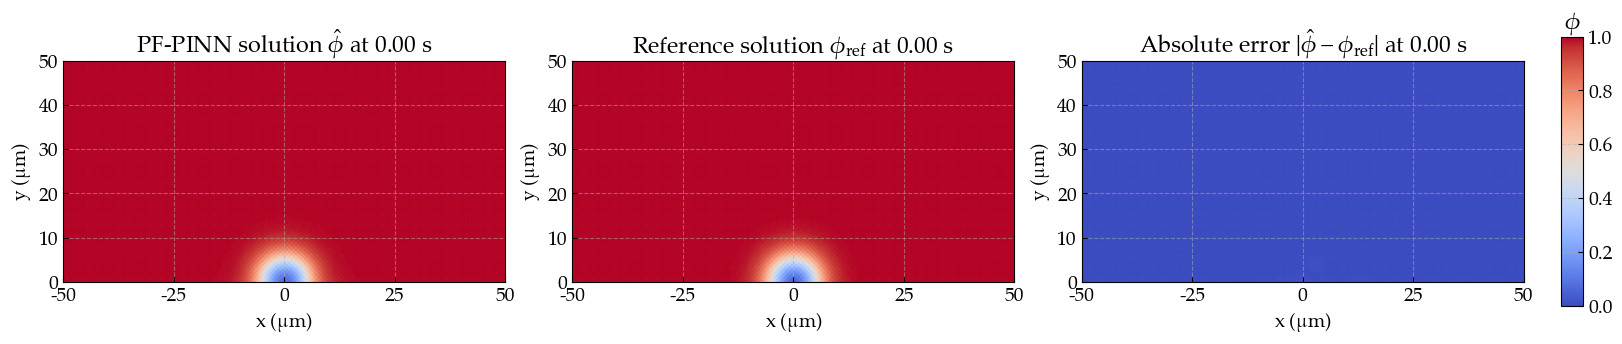

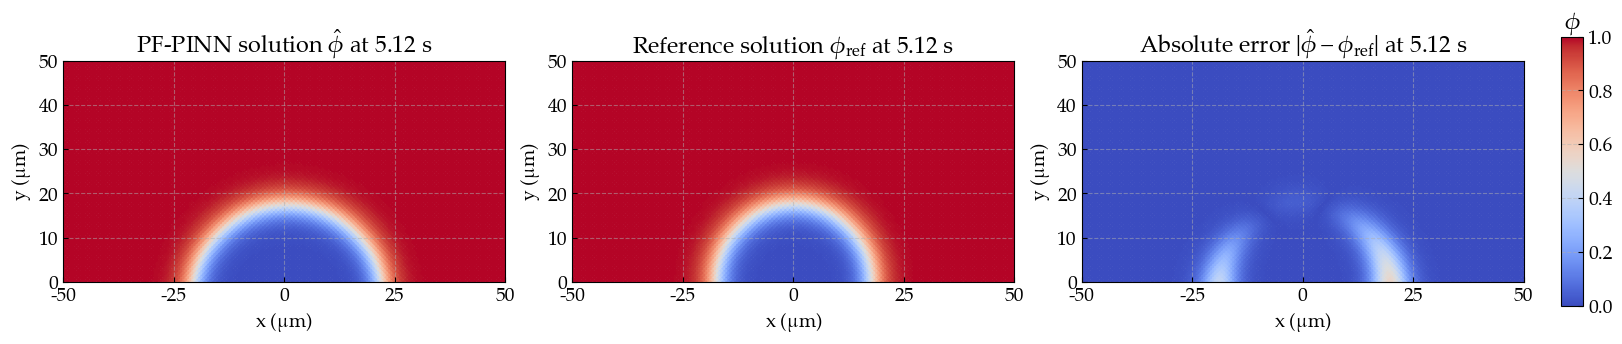

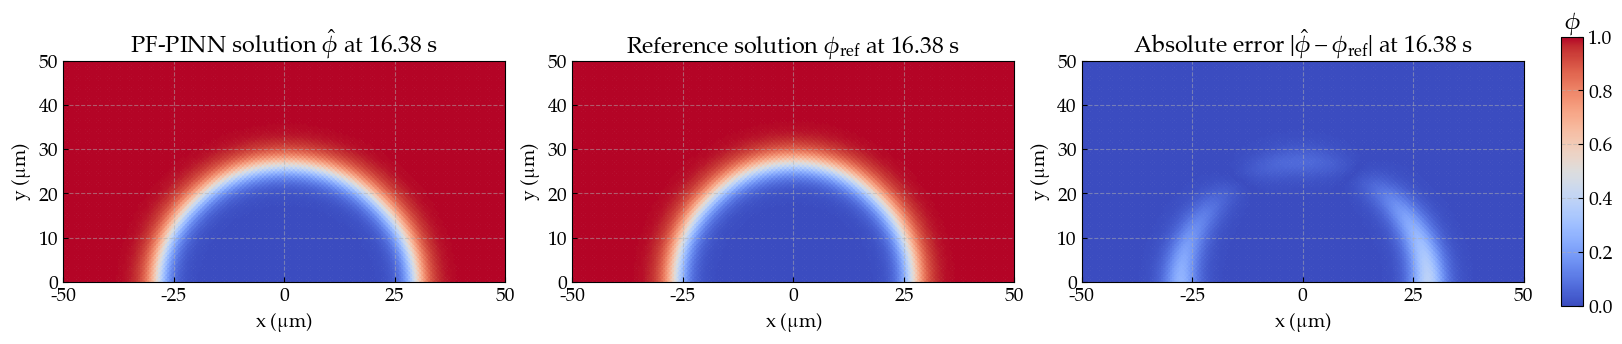

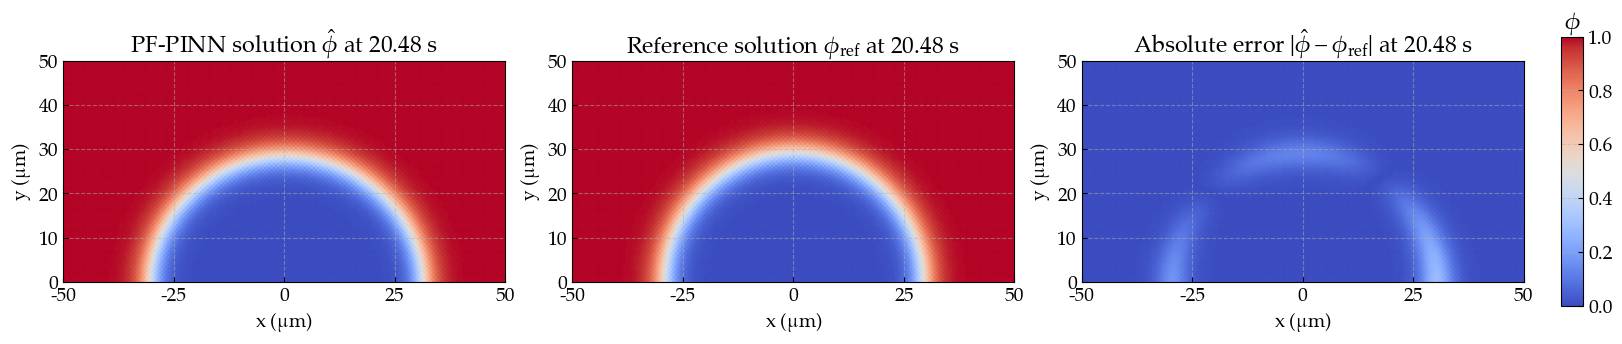

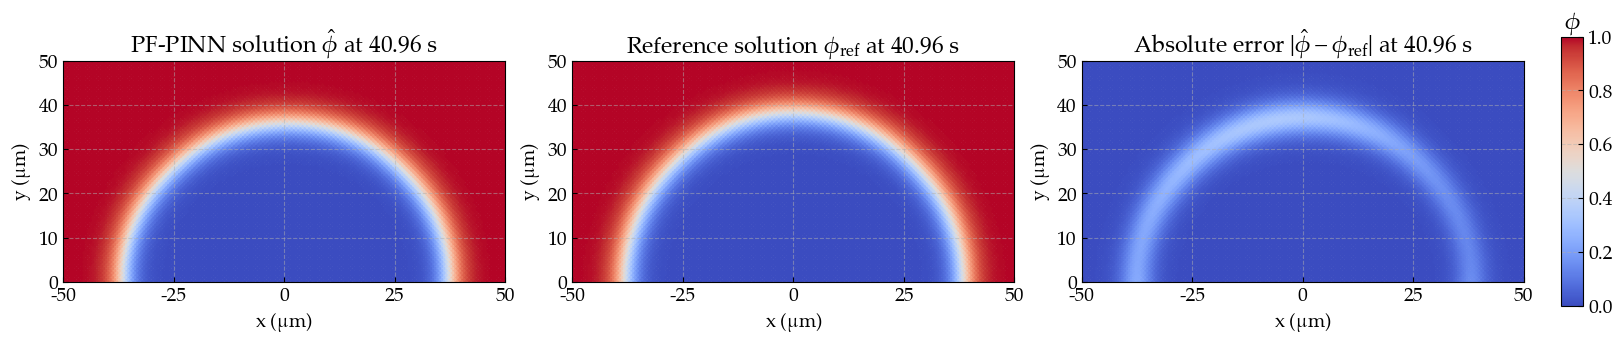

In [49]:
ts = [0.00, 5.12, 16.38, 20.48, 40.96]
# ts = [ 49.15]
mesh_points = np.load("./data/2d/mesh_points.npy") * 1e4
# mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
mse = 0
for idx, tic in enumerate(ts):
    
    fig = plt.figure(figsize=(20, 3.5))
    
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    ax = fig.add_subplot(gs[0])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
    )
    
    
    truth = np.load("./data/2d/sol-" + f"{tic:.2f}.npy")
    if np.abs(tic) < 1e-5:
        truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
                                     np.sqrt(2 * ALPHA_PHI) * \
                                    ( np.sqrt(mesh_points[:, 0]**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
        truth = np.vstack([truth_phi, truth_phi]).T
    
    diff = np.abs(truth[:, 0] - sol[:, 0])
    
    ax = fig.add_subplot(gs[1])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
    )

    ax = fig.add_subplot(gs[2])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
    )
    mse += np.mean(diff**2)
    ax_bar = fig.add_subplot(gs[3])
    fig.colorbar(ax.collections[0], cax=ax_bar)
    ax_bar.set_title(r'$\phi$', loc='center')
    plt.subplots_adjust(wspace=0.2)
    pos = ax_bar.get_position()
    ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
    # plt.savefig(save_root + f"2d-diffusion-baseline-fields-{idx}.png", dpi=300, bbox_inches='tight')
mse /= len(ts)
print(mse)

In [50]:
# ts = [0.00, 5.12, 10.24, 20.48, 40.96]
# # ts = [ 49.15]
# mesh_points = np.load("./data/2d/mesh_points.npy") * 1e4
# # mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
# mse = 0


# for epoch in range(20000, 25000, 1000):
    
#     fig = plt.figure(figsize=(20, 3.5*len(ts)))

#     gs = gridspec.GridSpec(len(ts), 4, width_ratios=[1, 1, 1, 0.05], hspace=0.35)
#     print(epoch)
#     path = f"runs/1pits-models/every-epoch/2024-06-02-11-47-28/model-{epoch}.pt"
#     state_dict = torch.load(path)

#     # Create a new state dict with the correct keys
#     new_state_dict = {}
#     for key, value in state_dict.items():
#         # Replace 'layer' with 'linear' in the keys
#         new_key = key.replace('layer', 'linear')
#         new_state_dict[new_key] = value

#     # Load the new state dict into the network
#     net.load_state_dict(new_state_dict)

#     for idx, tic in enumerate(ts):
        
        
#         tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
#         mesh_tensor = torch.from_numpy(mesh_points).float()
#         geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
#         with torch.no_grad():
#             sol = net(geotime).cpu().detach().numpy()

#         ax = fig.add_subplot(gs[idx, 0])
#         ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#         ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#         ax.set(
#             xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#             xlim=(-0.5, 0.5), ylim=(0, 0.5),
#             title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
#         )
        
        
#         truth = np.load("./data/2d/sol-" + f"{tic:.2f}.npy")
#         if np.abs(tic) < 1e-5:
#             truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
#                                         np.sqrt(2 * ALPHA_PHI) * \
#                                         ( np.sqrt(mesh_points[:, 0]**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
#             truth = np.vstack([truth_phi, truth_phi]).T
        
#         diff = np.abs(truth[:, 0] - sol[:, 0])
        
#         ax = fig.add_subplot(gs[idx, 1])
#         ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#         ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#         ax.set(
#             xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#             xlim=(-0.5, 0.5), ylim=(0, 0.5),
#             title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
#         )

#         ax = fig.add_subplot(gs[idx, 2])
#         ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, s=5, cmap='coolwarm', vmin=0, vmax=1)
#         ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#         ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#         ax.set(
#             xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#             xlim=(-0.5, 0.5), ylim=(0, 0.5),
#             title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
#         )
#         mse += np.mean(diff**2)
#         ax_bar = fig.add_subplot(gs[idx, 3])
#         fig.colorbar(ax.collections[0], cax=ax_bar)
#         ax_bar.set_title(r'$\phi$', loc='center')
#         plt.subplots_adjust(wspace=0.2)
#         pos = ax_bar.get_position()
#         ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
#     plt.savefig(f"./figures/2d1pits-every-epoch/{epoch}.png", dpi=300, bbox_inches='tight')
#     mse /= len(ts)
#     print(mse)

In [51]:
# ts = [0.00, 5.12, 10.24, 20.48, 40.96]
# from matplotlib import gridspec
# import tqdm
# import matplotlib
# # %matplotlib inline
# # matplotlib.use('Agg')

# # for epoch in range(0, 1000, 100):
# for epoch in range(0, 10000, 100):
    
#     state_dict = torch.load("./runs/1pits-models/model-12000.pt")

#     # Create a new state dict with the correct keys
#     new_state_dict = {}
#     for key, value in state_dict.items():
#         # Replace 'layer' with 'linear' in the keys
#         new_key = key.replace('layer', 'linear')
#         new_state_dict[new_key] = value

#     # Load the new state dict into the network
#     net.load_state_dict(new_state_dict)


# # ts = [ 49.15]
# mesh_points = np.load("./data/2d/mesh_points.npy") * 1e4
# # mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
# mse = 0
# for idx, tic in enumerate(ts):
    
#     fig = plt.figure(figsize=(20, 3.5))
    
#     gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
    
    
#     tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
#     mesh_tensor = torch.from_numpy(mesh_points).float()
#     geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
#     with torch.no_grad():
#         sol = net(geotime).cpu().detach().numpy()

#     ax = fig.add_subplot(gs[0])
#     ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 0.5),
#         title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
#     )
    
    
#     truth = np.load("./data/2d/sol-" + f"{tic:.2f}.npy")
#     if np.abs(tic) < 1e-5:
#         truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
#                                      np.sqrt(2 * ALPHA_PHI) * \
#                                     ( np.sqrt(mesh_points[:, 0]**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
#         truth = np.vstack([truth_phi, truth_phi]).T
    
#     diff = np.abs(truth[:, 0] - sol[:, 0])
    
#     ax = fig.add_subplot(gs[1])
#     ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 0.5),
#         title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
#     )

#     ax = fig.add_subplot(gs[2])
#     ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, s=5, cmap='coolwarm', vmin=0, vmax=1)
#     ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#     ax.set(
#         xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
#         xlim=(-0.5, 0.5), ylim=(0, 0.5),
#         title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
#     )
#     mse += np.mean(diff**2)
#     ax_bar = fig.add_subplot(gs[3])
#     fig.colorbar(ax.collections[0], cax=ax_bar)
#     ax_bar.set_title(r'$\phi$', loc='center')
#     plt.subplots_adjust(wspace=0.2)
#     pos = ax_bar.get_position()
#     ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
#     # plt.savefig(save_root + f"2d-diffusion-baseline-fields-{idx}.png", dpi=300, bbox_inches='tight')
# mse /= len(ts)
# print(mse)



0.0
0.51
1.02
2.05
5.12
10.24
16.38
20.48
28.67
32.77
40.96
49.15


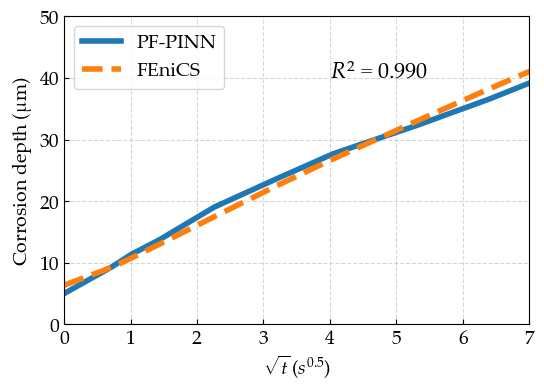

In [52]:
import os
import re
ts = [0.00, 0.51, 1.02, 2.05, 5.12, 10.24, 16.38, 20.48, 28.67, 32.77, 40.96, 49.15]
radius = []
radius_ref = []
# all_ref_files = os.listdir("./data/2d/")
# all_ref_files = list(filter(lambda x : x.startswith("sol-"), all_ref_files))
# for ref_file in all_ref_files:
for tic in ts:
    ref_file = f"sol-{tic:.2f}.npy"
    # tic = float(re.findall(r"\d+\.\d+", ref_file)[0])
    
    truth = np.load("./data/2d/" + ref_file)
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-2)[0]
    interface_location_coords = mesh_points[interface_location_idx]
    interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2).mean()
    
    
    interface_location_idx_ref = np.where(np.abs(truth[:, 0] - 0.5) < 1e-2)[0]
    interface_location_coords_ref = mesh_points[interface_location_idx_ref]
    interface_location_radius_ref = np.sqrt(interface_location_coords_ref[:, 0]**2 + interface_location_coords_ref[:, 1]**2).mean()
    
    print(tic)
    # ts.append(tic)
    radius.append(interface_location_radius)
    radius_ref.append(interface_location_radius_ref)
    
ts = np.array(ts)
radius = np.array(radius)
radius_ref = np.array(radius_ref)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sqrt(ts), radius, label="PF-PINN", linewidth=4)
ax.plot(np.sqrt(ts), radius_ref, label="FEniCS", linestyle='--', linewidth=4)
ax.legend()
ax.set(
    xlim=(0, 7), ylim=(0, 0.5),
    xlabel=r"$\sqrt{t}\, (s^{0.5})$", ylabel='Corrosion depth ' + r"$\mathrm{(\mu m)}$",
)
r2 = lambda x, y : 1 - np.sum((x - y)**2) / np.sum((x - x.mean())**2)
r2_score = r2(
    np.array(radius), 
    np.array(radius_ref)
)
ax.text(4, 0.4, f"$R^2$ = {r2_score:.3f}", fontsize=16)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
# plt.savefig(save_root + "2d-diffusion-baseline-interface.pdf", dpi=300, bbox_inches='tight')

In [53]:
np.where(np.abs(sol[:, 0] - 0.5) < 2e-2)[0]

array([ 1975,  1976,  1977,  1978,  1979,  1980,  1981,  1982,  1983,
        1984,  2059,  2060,  2080,  2081,  2147,  2176,  2238,  2273,
        2331,  2372,  2427,  2472,  2525,  2574,  2623,  2676,  2721,
        2820,  2879,  2918,  3017,  3082,  3116,  3183,  4092,  4193,
        4495,  4797,  4998,  5199,  5400,  5701,  5902,  6002,  6303,
        6704,  6804,  6904,  8432,  8514,  8821,  8893,  9096,  9281,
        9394,  9596,  9685,  9766,  9803,  9903,  9932,  9959,  9984,
       10007], dtype=int64)

In [54]:
interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-3)[0]
interface_location_coords = mesh_points[interface_location_idx]
interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2)
interface_location_radius.mean()

0.38639358172723315

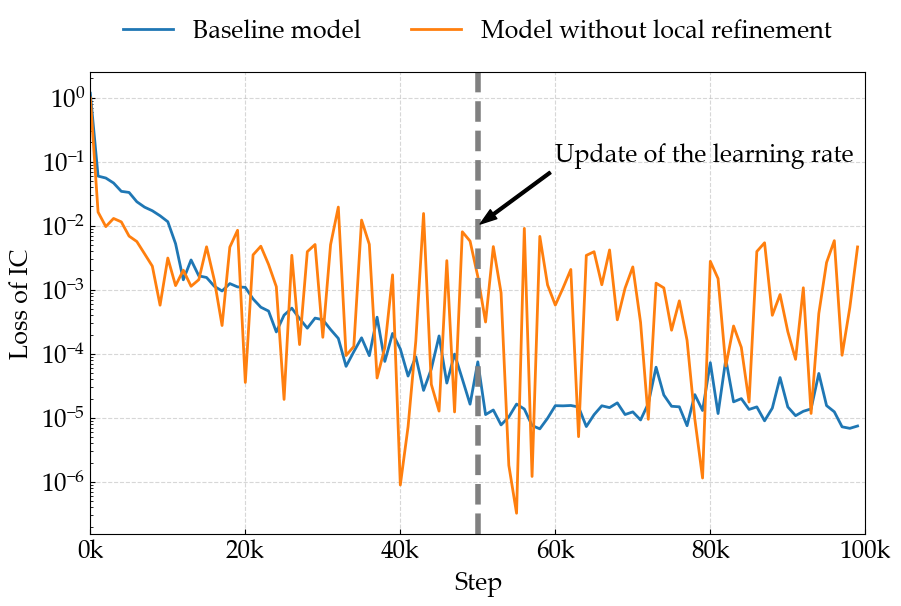

In [55]:
loss_ic_baseline_s1 = pd.read_csv("./runs/losses/run-1103-2dd-s1-58k-tag-loss_ic.csv")
loss_ic_baseline_s2 = pd.read_csv("./runs/losses/run-1103-2dd-s2-247k-tag-loss_ic.csv")
baseline_steps = np.hstack([
    loss_ic_baseline_s1.Step[:50].values,
    loss_ic_baseline_s2.Step[:50].values + 50000,
])
baseline_values = np.hstack([
    loss_ic_baseline_s1.Value[:50].values,
    loss_ic_baseline_s2.Value[:50].values,
])

loss_ic_wrong_s1 = pd.read_csv("./runs/losses/run-2dd-wrong-ic-s1-50k-tag-loss_ic.csv")
loss_ic_wrong_s2 = pd.read_csv("./runs/losses/run-2dd-wrong-ic-s2-50k-tag-loss_ic.csv")
wrong_steps = np.hstack([
    loss_ic_wrong_s1.Step[:50].values,
    loss_ic_wrong_s2.Step[:50].values + 50000,
])
wrong_values = np.hstack([
    loss_ic_wrong_s1.Value[:50].values,
    loss_ic_wrong_s2.Value[:50].values,
])

rc["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(baseline_steps, baseline_values, linewidth=2, label="Baseline model")
ax.plot(wrong_steps, wrong_values, linewidth=2, label="Model without local refinement")
ax.axvline(50000, color='grey', linestyle='--', linewidth=4)
ax.annotate("Update of the learning rate", xy=(50000, 0.01), xytext=(60000, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.03, width=2, headwidth=8),)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000):d}k'))

ax.set(yscale="log", xlabel="Step", ylabel="Loss of IC", xlim=(0, 100000))
ax.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=2, frameon=False)
rc["font.size"] = 14
# plt.savefig(save_root + "2d-diffusion-ic-loss-comparison.pdf", dpi=300, bbox_inches='tight')


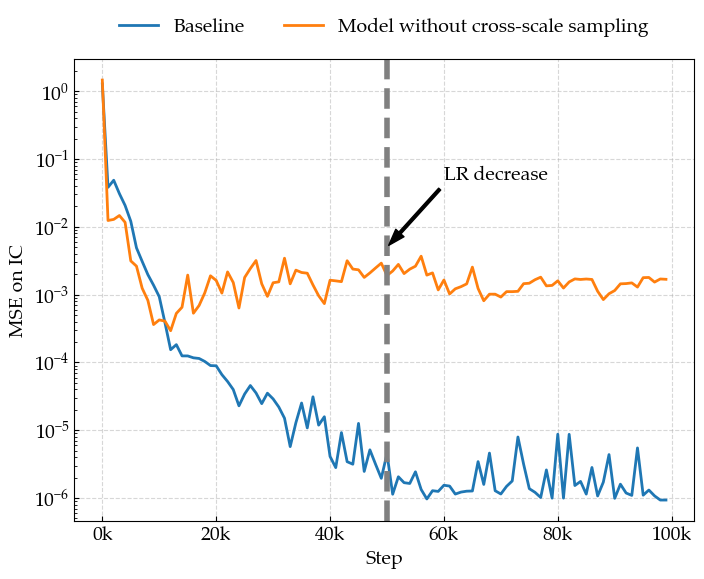

In [56]:
mse_ic_baseline_s1 = []
prefix = "./runs/1103-2dd-s1-58k/"
truth = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
        np.sqrt(2 * ALPHA_PHI) * ( np.sqrt(mesh_points[:, 0]**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2

for step in loss_ic_baseline_s1.iloc[:50, 1]:
    # net.load_state_dict(torch.load(prefix + f"model-{step}.pt"))
    
    state_dict = torch.load(prefix + f"model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * 0 * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()

    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()
    diff = np.abs(truth - sol[:, 0])
    mse_ic_baseline_s1.append(np.mean(diff**2))

mse_ic_baseline_s2 = []
prefix = "./runs/1103-2dd-s2-247k/"
# truth = np.load("./data/2d/sol-0.00.npy")
for step in loss_ic_baseline_s1.iloc[:50, 1]:
    # net.load_state_dict(torch.load(prefix + f"model-{step}.pt"))
    state_dict = torch.load(prefix + f"model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * 0 * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()
    diff = np.abs(truth - sol[:, 0])
    mse_ic_baseline_s2.append(np.mean(diff**2))
baseline_sol = sol.copy()
mse_ic_baseline = mse_ic_baseline_s1 + mse_ic_baseline_s2
mse_ic_baseline = np.array(mse_ic_baseline)

mse_ic_wrong_s1 = []
prefix = "./runs/2dd-wrong-ic-s1-50k/"
# truth = np.load("./data/2d/sol-0.00.npy")
for step in loss_ic_wrong_s1.iloc[:50, 1]:
    # net.load_state_dict(torch.load(prefix + f"model-{step}.pt"))
    
    state_dict = torch.load(prefix + f"model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * 0 * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()
    diff = np.abs(truth - sol[:, 0])
    mse_ic_wrong_s1.append(np.mean(diff**2))

mse_ic_wrong_s2 = []
prefix = "./runs/2dd-wrong-ic-s2-50k/"
# truth = np.load("./data/2d/sol-0.00.npy")
for step in loss_ic_wrong_s1.iloc[:50, 1]:
    # net.load_state_dict(torch.load(prefix + f"model-{step}.pt"))
    state_dict = torch.load(prefix + f"model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * 0 * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()
    diff = np.abs(truth - sol[:, 0])
    mse_ic_wrong_s2.append(np.mean(diff**2))
wrong_sol = sol.copy()
mse_ic_wrong = mse_ic_wrong_s1 + mse_ic_wrong_s2
mse_ic_wrong = np.array(mse_ic_wrong)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(baseline_steps, mse_ic_baseline, linewidth=2, label="Baseline")
ax.plot(wrong_steps, mse_ic_wrong, linewidth=2, label="Model without cross-scale sampling")
ax.axvline(50000, color='grey', linestyle='--', linewidth=4)
ax.annotate("LR decrease", xy=(50000, 0.005), xytext=(60000, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.03, width=2, headwidth=8),
            )
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000):d}k'))

ax.set(yscale="log", xlabel="Step", ylabel="MSE on IC")
ax.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=2, frameon=False)
# plt.savefig(save_root + "2d-diffusion-ic-mse-comparison.png", dpi=300, bbox_inches='tight')

In [57]:
np.sqrt(mesh_tensor[:, 0]**2 + mesh_tensor[:, 1]**2)

tensor([0.7071, 0.7001, 0.7000,  ..., 0.4950, 0.5001, 0.5000])

[Text(0.5, 0, 'x $\\mathrm{(\\mu m)}$'),
 Text(0, 0.5, 'y $\\mathrm{(\\mu m)}$'),
 None,
 (-0.5, 0.5),
 (0.0, 0.5),
 Text(0.5, 1.0, 'PINN solution $\\hat\\phi$ at 0.00 s')]

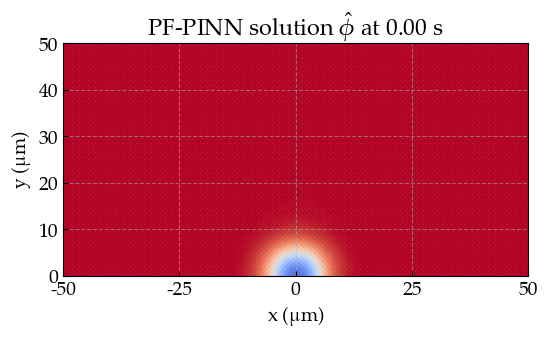

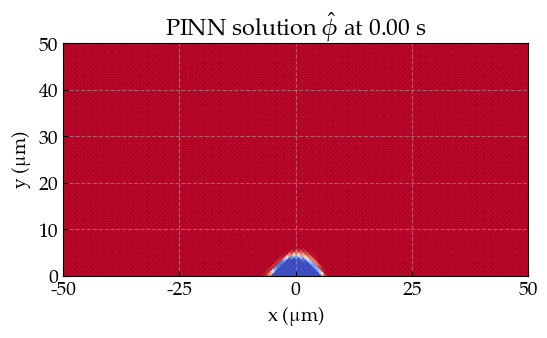

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=baseline_sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(aspect='equal', xlim=(-0.5, 0.5), ylim=(0, 0.5), xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", title="Baseline model")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 0.5),
    title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{0.00:.2f} s"
)
# plt.savefig(save_root + "2d-diffusion-ic-fields-comparison-a.png", dpi=300, bbox_inches='tight')


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=wrong_sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
ax.set(aspect='equal', xlim=(-0.5, 0.5), ylim=(0, 0.5), xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", title="Model with discontinuous IC")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
ax.set(
    xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
    xlim=(-0.5, 0.5), ylim=(0, 0.5),
    title=r"PINN solution $\hat\phi$" + " at "+ f"{0.00:.2f} s"
)
# plt.savefig(save_root + "2d-diffusion-ic-fields-comparison-b.png", dpi=300, bbox_inches='tight')

# ax = axes[2]""
# truth = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
#         np.sqrt(2 * ALPHA_PHI) * ( np.sqrt(mesh_points[:, 0]**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
# ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth, s=5, cmap='coolwarm', vmin=0, vmax=1)
# ax.set(aspect='equal', xlim=(-0.5, 0.5), ylim=(0, 0.5), xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="x " + r"$\mathrm{(\mu m)}$", title="FEniCS solution")


[None, Text(0.5, 0, 'Step'), Text(0, 0.5, 'MSE on IC')]

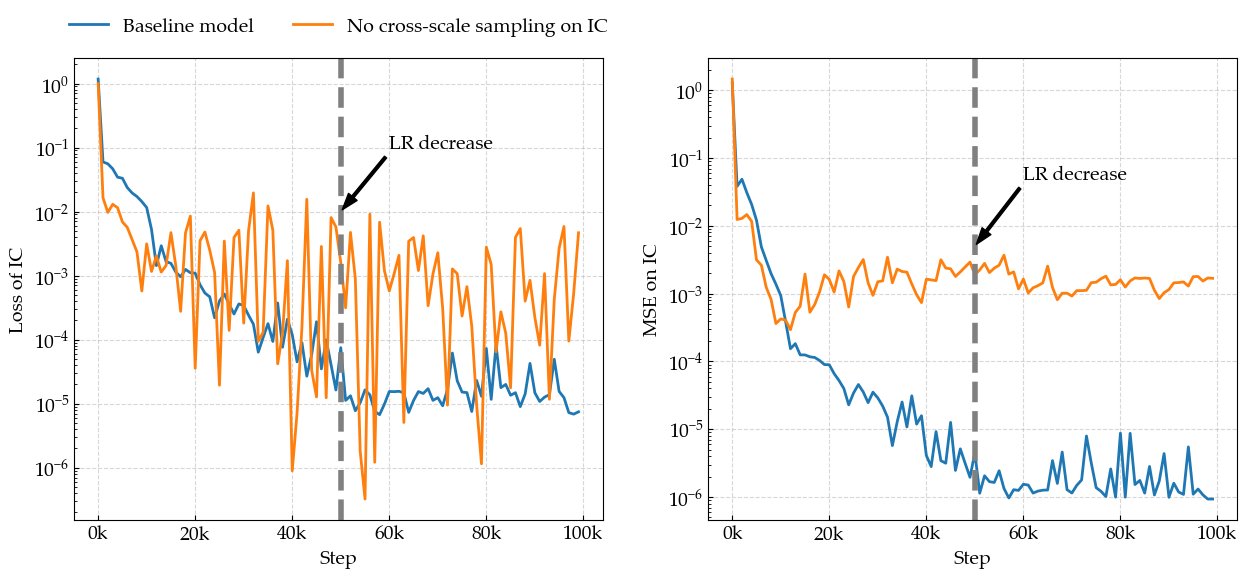

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ax.plot(baseline_steps, baseline_values, linewidth=2, label="Baseline model")
ax.plot(wrong_steps, wrong_values, linewidth=2, label="No cross-scale sampling on IC")
ax.axvline(50000, color='grey', linestyle='--', linewidth=4)
ax.annotate("LR decrease", xy=(50000, 0.01), xytext=(60000, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.03, width=2, headwidth=8),)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000):d}k'))

ax.set(yscale="log", xlabel="Step", ylabel="Loss of IC",)
ax.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=2, frameon=False)

ax = axes[1]
ax.plot(baseline_steps, mse_ic_baseline, linewidth=2, label="Baseline")
ax.plot(wrong_steps, mse_ic_wrong, linewidth=2, label="No cross-scale sampling on IC")
ax.axvline(50000, color='grey', linestyle='--', linewidth=4)
ax.annotate("LR decrease", xy=(50000, 0.005), xytext=(60000, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.03, width=2, headwidth=8),
            )
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000):d}k'))

ax.set(yscale="log", xlabel="Step", ylabel="MSE on IC")

In [60]:
# gsg = np.load("./gs-gar copy.npy")
# gsr = np.load("./gs-rar copy.npy")
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# ax.hist(gsr, bins=200, density=True, label="Residual criterion")
# ax.hist(gsg, bins=200, density=True, label="Gradient criterion", alpha=0.5)
# ax.set(xlim=(-0.5, 0.5), ylim=(0, 35))
# ax.legend()

141000
213000
293500
313500
340500
434500


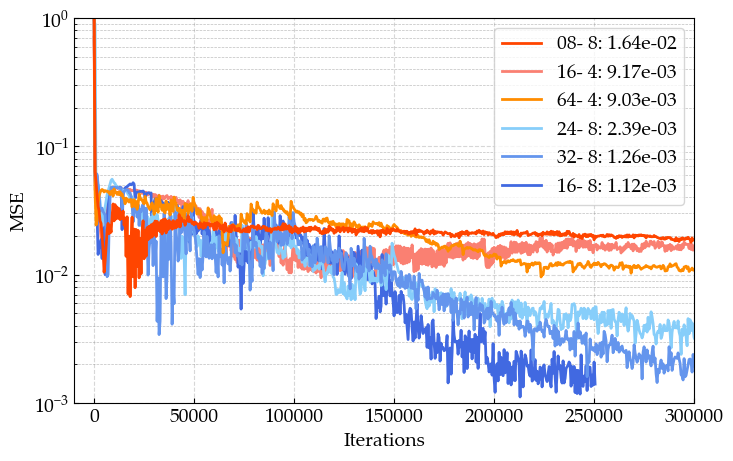

In [61]:
data_root = "./runs/2d-params-analysis/"
fnames = os.listdir(data_root)
fnames = list(filter(lambda x : not os.path.isdir(data_root + x), fnames))
neurons = list(map(lambda x : (int(x.split("-")[1]), int(x.split("-")[2])), fnames))
steps= []

color_maps = {
    (16, 8) : "RoyalBlue",
    (24, 8) : "LightSkyBlue",
    (32, 8) : "CornflowerBlue",
    (16, 4) : "Salmon",
    (8, 8) : "OrangeRed",
    (64, 4): "DarkOrange"
}


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 5))


for fname, neuron in zip(fnames, neurons):
    data = pd.read_csv(data_root + fname)
    acc = data["Value"].values
    if neuron == (24, 8):
        acc += 0.001
    mse = (1 - acc)
    mse_min = mse[100:].min()
    step = data.loc[np.argmin(mse[100:])+100, "Step"] # 跳过前 100 * 500 step
    steps.append(step)
    print(step)
    label = f"{str(neuron[0]).zfill(2):2}-{neuron[1]:2}: {mse_min:4.2e}"
    ax.plot(data["Step"].values, mse, label=label, color=color_maps[neuron], linewidth=2)

    
    
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), reverse=True, key=lambda l: eval(l[0].split(":")[1].strip())))

    ax.legend(handles, labels)
ax.set(yscale="log", xlabel="Iterations", ylabel="MSE", ylim=(1e-3, 1), xlim=(-10000, 300000))
# set minor grid lines
ax.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# plt.savefig(save_root + "2d-diffusion-params-analysis-mse.pdf", dpi=300, bbox_inches='tight')

0.0
0.51
1.02
2.05
5.12
10.24
16.38
20.48
28.67
32.77
40.96
49.15


NameError: name 'pc' is not defined

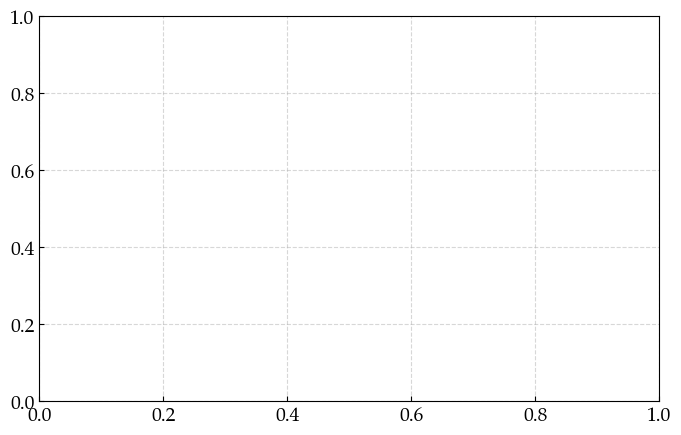

In [62]:
import os
import re
ts = [0.00, 0.51, 1.02, 2.05, 5.12, 10.24, 16.38, 20.48, 28.67, 32.77, 40.96, 49.15]

radius_ref = []



fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ts = np.array(ts)

for tic in ts:
    ref_file = f"sol-{tic:.2f}.npy"
    # tic = float(re.findall(r"\d+\.\d+", ref_file)[0])
    
    truth = np.load("./data/2d/" + ref_file)
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    
#     with torch.no_grad():
#         sol = net(geotime).cpu().detach().numpy()

#     interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-2)[0]
#     interface_location_coords = mesh_points[interface_location_idx]
#     interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2).mean()
    
    
    interface_location_idx_ref = np.where(np.abs(truth[:, 0] - 0.5) < 1e-2)[0]
    interface_location_coords_ref = mesh_points[interface_location_idx_ref]
    interface_location_radius_ref = np.sqrt(interface_location_coords_ref[:, 0]**2 + interface_location_coords_ref[:, 1]**2).mean()
    
    print(tic)
    # ts.append(tic)
    
    radius_ref.append(interface_location_radius_ref)
    


radius_ref = np.array(radius_ref)


for neuron, step in zip(neurons, steps):
    net = pc.PFPINN(
        sizes=[3] + [neuron[0]]*neuron[1] + [2],
        act=torch.nn.Tanh,
    )
    net.to(net.device)
    state_dict = torch.load(f"./runs/2d-params-analysis/{neuron[0]}-{neuron[1]}/model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    print("load model", neuron, step)
    radius = []
    for tic in ts:
        tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
        mesh_tensor = torch.from_numpy(mesh_points).float()
        geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
        
            
        with torch.no_grad():
            sol = net(geotime).cpu().detach().numpy()

        interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-2)[0]
        interface_location_coords = mesh_points[interface_location_idx]
        interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2).mean()
        
        radius.append(interface_location_radius)

        
    radius = np.array(radius)
    r2 = lambda x, y : 1 - np.sum((x - y)**2) / np.sum((x - x.mean())**2)
    r2_score = r2(
        np.array(radius), 
        np.array(radius_ref)
    )
    label = f"{str(neuron[0]).zfill(2):2}-{neuron[1]:2}: {r2_score:4.3f}"
    ax.plot(np.sqrt(ts), radius, label=label, linewidth=4, color=color_maps[neuron], marker='o', markersize=10)
    
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), reverse=True, key=lambda l: eval(l[0].split(":")[1].strip())))
    

ax.plot(np.sqrt(ts), radius_ref, label="FEniCS", linestyle='--', linewidth=4, color='black')
# append FEniCS to legend
labels = list(labels)
handles = list(handles)
labels.append("FEniCS")
handles.append(Line2D([0], [0], linestyle='--', linewidth=4, color='black'))
# use annotation to mark fenics curve
# ax.arrow(4, 0.36, 2, 0, head_width=0.01, head_length=0.5, fc='k', ec='k', length_includes_head=True)
ax.legend(handles, labels, frameon=True)
# ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1.0, 1.0), frameon=True, title=r"$R^2$ scores")
ax.set(
    xlim=(0, 7), ylim=(0, 0.5),
    xlabel=r"$\sqrt{t}\, (s^{0.5})$", ylabel='Corrosion depth ' + r"$\mathrm{(\mu m)}$",
)

# ax.text(4, 0.4, f"$R^2$ = {r2_score:.3f}", fontsize=16)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
# plt.savefig(save_root + "2d-diffusion-params-analysis-interface.pdf", dpi=300, bbox_inches='tight')

load model (16, 4) 141000
load model (16, 8) 213000
load model (24, 8) 293500
load model (32, 8) 313500
load model (64, 4) 340500
load model (8, 8) 434500
0.0
0.51
1.02
2.05
5.12
10.24
16.38
20.48
28.67
32.77
40.96
49.15


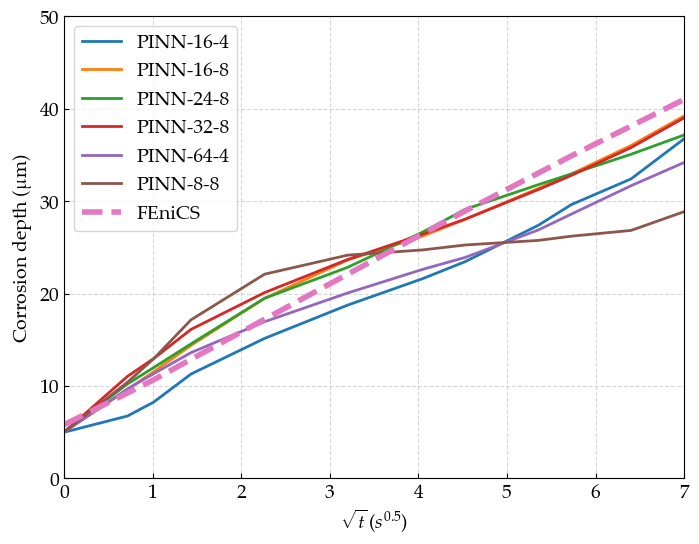

In [ ]:
import os
import re
ts = [0.00, 0.51, 1.02, 2.05, 5.12, 10.24, 16.38, 20.48, 28.67, 32.77, 40.96, 49.15]

radius_ref = []



fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ts = np.array(ts)


for neuron, step in zip(neurons, steps):
    net = pc.PFPINN(
        sizes=[3] + [neuron[0]]*neuron[1] + [2],
        act=torch.nn.Tanh,
    )
    net.to(net.device)
    # net.load_state_dict(torch.load(f"./runs/2d-params-analysis/{neuron[0]}-{neuron[1]}/model-{step}.pt"))
    
    state_dict = torch.load(f"./runs/2d-params-analysis/{neuron[0]}-{neuron[1]}/model-{step}.pt")

    # Create a new state dict with the correct keys
    new_state_dict = {}
    for key, value in state_dict.items():
        # Replace 'layer' with 'linear' in the keys
        new_key = key.replace('layer', 'linear')
        new_state_dict[new_key] = value

    # Load the new state dict into the network
    net.load_state_dict(new_state_dict)
    print("load model", neuron, step)
    radius = []
    for tic in ts:
        tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
        mesh_tensor = torch.from_numpy(mesh_points).float()
        geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
        
            
        with torch.no_grad():
            sol = net(geotime).cpu().detach().numpy()

        interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-2)[0]
        interface_location_coords = mesh_points[interface_location_idx]
        interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2).mean()
        
        radius.append(interface_location_radius)
    radius = np.array(radius)
    ax.plot(np.sqrt(ts), radius, label=f"PINN-{neuron[0]}-{neuron[1]}", linewidth=2)
        
    
    
for tic in ts:
    ref_file = f"sol-{tic:.2f}.npy"
    # tic = float(re.findall(r"\d+\.\d+", ref_file)[0])
    
    truth = np.load("./data/2d/" + ref_file)
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    
#     with torch.no_grad():
#         sol = net(geotime).cpu().detach().numpy()

#     interface_location_idx = np.where(np.abs(sol[:, 0] - 0.5) < 1e-2)[0]
#     interface_location_coords = mesh_points[interface_location_idx]
#     interface_location_radius = np.sqrt(interface_location_coords[:, 0]**2 + interface_location_coords[:, 1]**2).mean()
    
    
    interface_location_idx_ref = np.where(np.abs(truth[:, 0] - 0.5) < 1e-2)[0]
    interface_location_coords_ref = mesh_points[interface_location_idx_ref]
    interface_location_radius_ref = np.sqrt(interface_location_coords_ref[:, 0]**2 + interface_location_coords_ref[:, 1]**2).mean()
    
    print(tic)
    # ts.append(tic)
    
    radius_ref.append(interface_location_radius_ref)
    


radius_ref = np.array(radius_ref)


ax.plot(np.sqrt(ts), radius_ref, label="FEniCS", linestyle='--', linewidth=4)
ax.legend()
ax.set(
    xlim=(0, 7), ylim=(0, 0.5),
    xlabel=r"$\sqrt{t}\, (s^{0.5})$", ylabel='Corrosion depth ' + r"$\mathrm{(\mu m)}$",
)
r2 = lambda x, y : 1 - np.sum((x - y)**2) / np.sum((x - x.mean())**2)
r2_score = r2(
    np.array(radius), 
    np.array(radius_ref)
)
# ax.text(4, 0.4, f"$R^2$ = {r2_score:.3f}", fontsize=16)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))

## 2d-d-2pits-evaluate

In [6]:

import torch
import pf_pinn as pfp

from matplotlib import gridspec

net = pfp.PFPINN(
    # sizes=eval(config.get("TRAIN", "NETWORK_SIZE")),
    act=torch.nn.Tanh
)


net.to(net.device)

net.load_state_dict(torch.load("/root/tf-logs/2pits-modifiedmlp-2024-07-17-19-00-11/model-24000.pt"))
# net.load_state_dict(torch.load("/root/tf-logs/2pits-attention-resnet-baseline/model-95000.pt"))

<All keys matched successfully>

/tmp/ipykernel_10657/1214466071.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.collections[0], cax=ax_bar)
findfont: Font family ['asana math'] not found. Falling back to DejaVu Sans.


0.01112389975643347


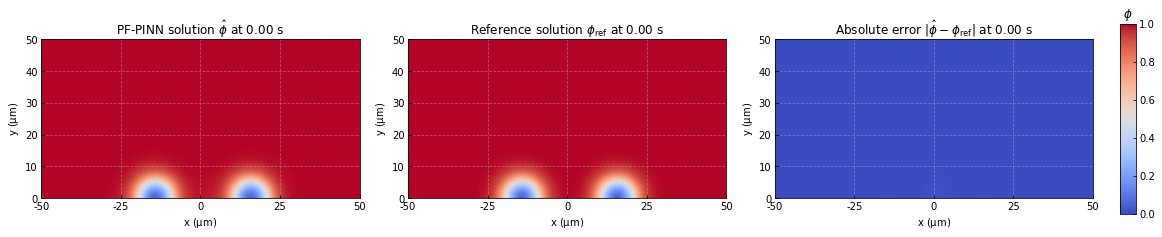

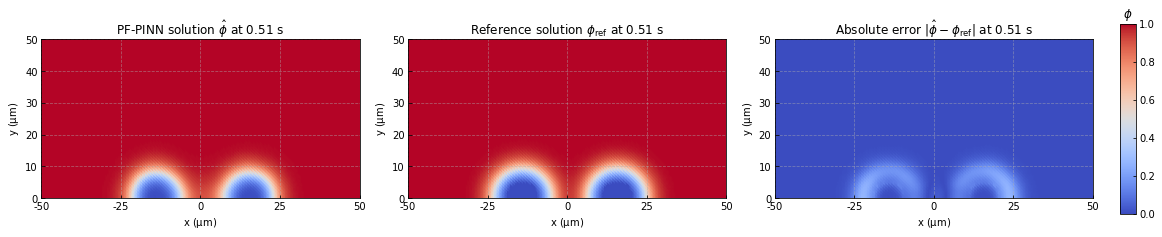

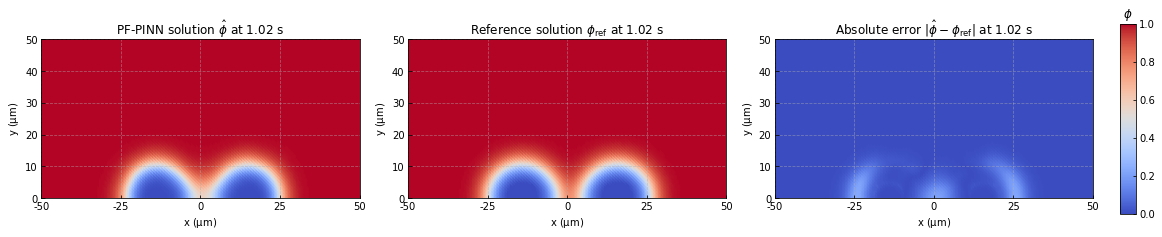

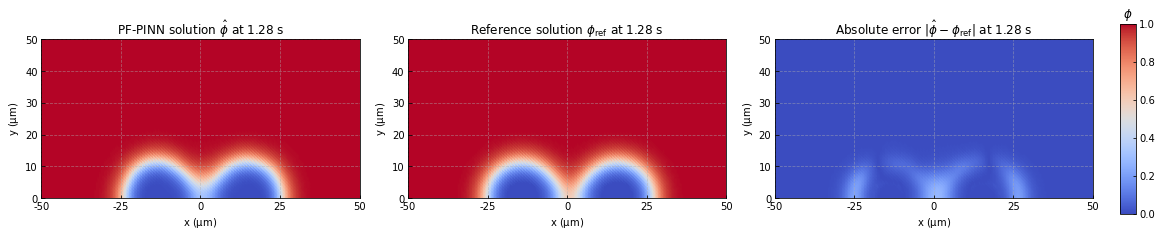

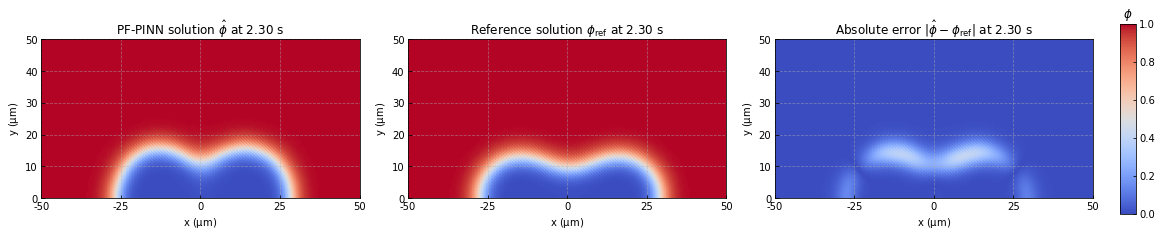

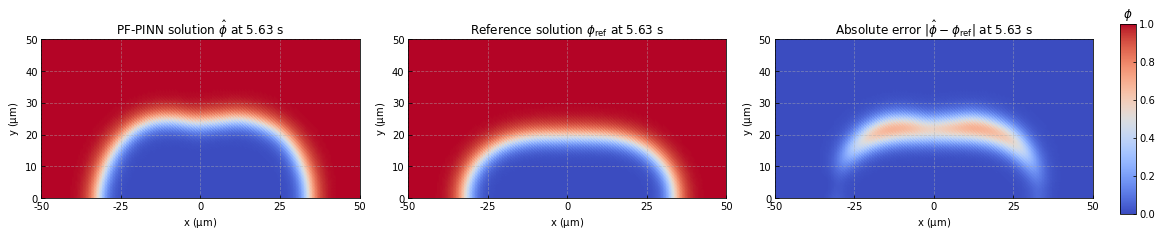

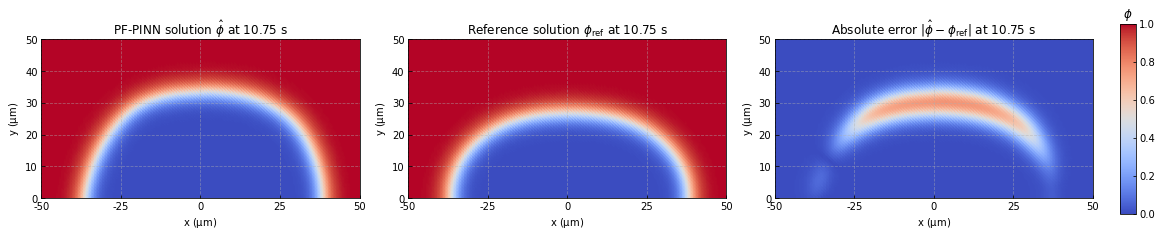

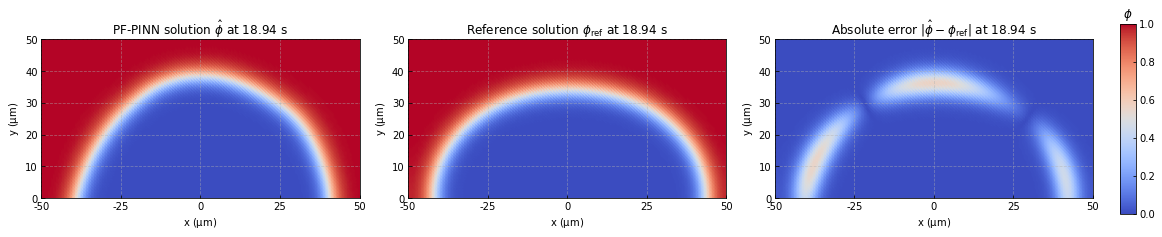

In [7]:
ts = [0.00, 0.51, 1.02, 1.28, 2.30, 5.63, 10.75, 18.94]
# ts = [ 49.15]
mesh_points = np.load("./data/2d-2pits/mesh_points.npy") * 1e4
# mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
mse = 0
for idx, tic in enumerate(ts):
    
    fig = plt.figure(figsize=(20, 3.5))
    
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    ax = fig.add_subplot(gs[0])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
    )
    
    truth = np.load("./data/2d-2pits/sol-" + f"{tic:.2f}.npy")
    if np.abs(tic) < 1e-5:
        truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
                                     np.sqrt(2 * ALPHA_PHI) * \
                                    ( np.sqrt((np.abs(mesh_points[:, 0]) - 0.15)**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
        truth = np.vstack([truth_phi, truth_phi]).T
    
    diff = np.abs(truth[:, 0] - sol[:, 0])
    
    
    ax = fig.add_subplot(gs[1])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
    )
    
    ax = fig.add_subplot(gs[2])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, cmap='coolwarm', vmin=0, vmax=1)
    # ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
    )
    mse += np.mean(diff**2)
    ax_bar = fig.add_subplot(gs[3])
    fig.colorbar(ax.collections[0], cax=ax_bar)
    ax_bar.set_title(r'$\phi$', loc='center')
    plt.subplots_adjust(wspace=0.2)
    pos = ax_bar.get_position()
    ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
    # plt.savefig(save_root + f"2d-diffusion-2pits-baseline-fields-{idx}.png", dpi=300, bbox_inches='tight')
mse /= len(ts)
print(mse)

/tmp/ipykernel_10657/3008460737.py:84: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.collections[0], cax=ax_bar)


0.012524132411541503


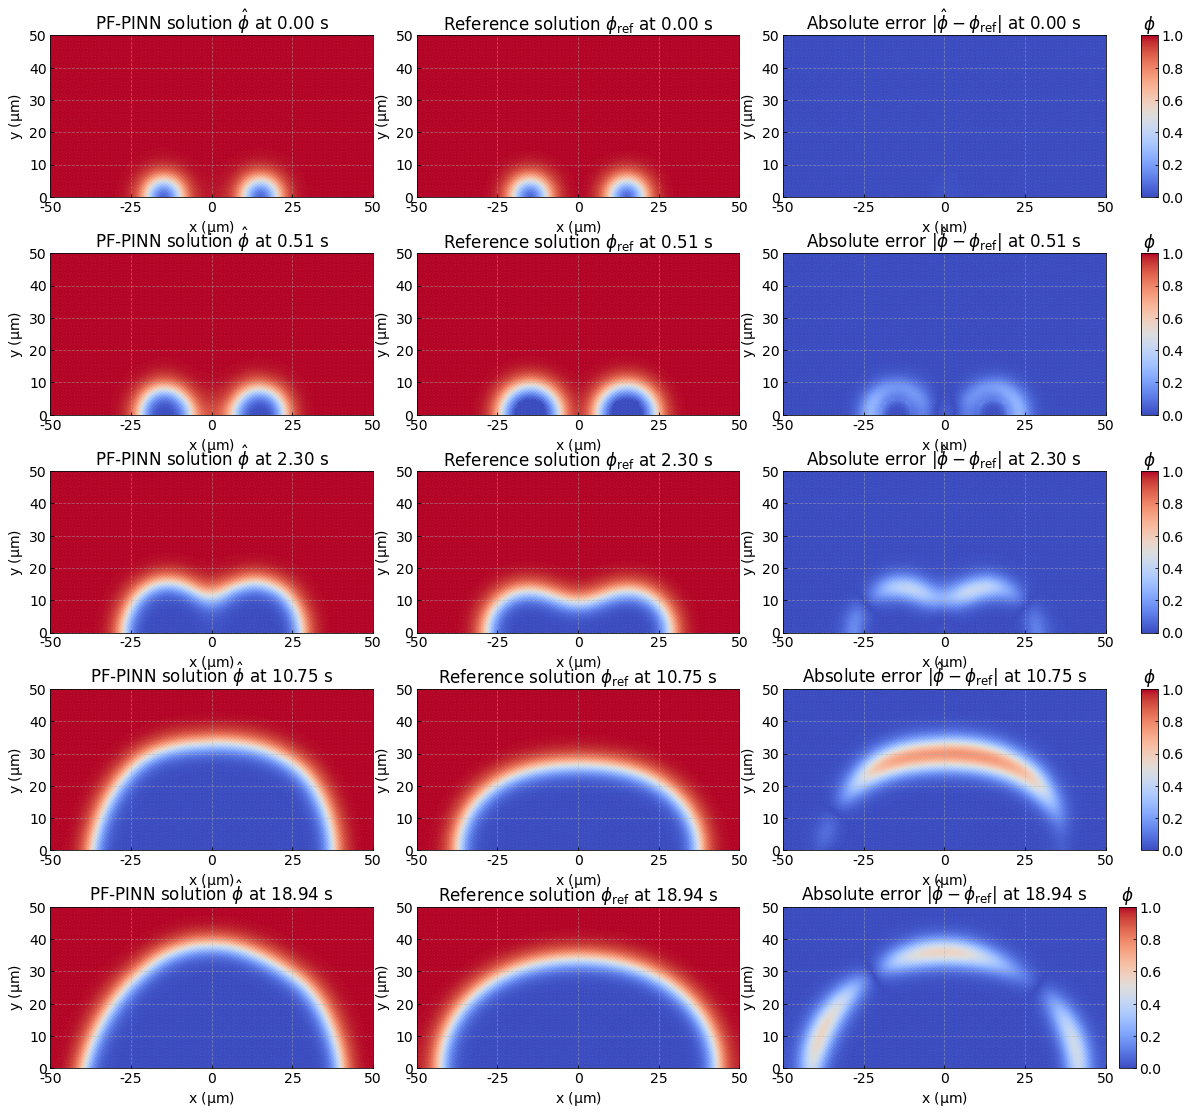

In [8]:
ts = [0.00, 0.51,  2.30, 10.75, 18.94]
# ts = [ 49.15]
# mesh_points = np.load("./data/2d/mesh_points.npy") * 1e4
# mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
mse = 0
import matplotlib
# matplotlib.use('Agg')

matplotlib.rcParams["font.size"] = 14



# for epoch in range(0, 280000, 2000):

fig = plt.figure(figsize=(20, 3.8*len(ts)))

gs = gridspec.GridSpec(len(ts), 4, width_ratios=[1, 1, 1, 0.05], hspace=0.35, wspace=0.1)
# print(epoch)
# path = f"runs/2pits-models/2pits-models-every-epoch/2024-06-02-19-10-20/model-{epoch}.pt"
# state_dict = torch.load(path)

# # Create a new state dict with the correct keys
# new_state_dict = {}
# for key, value in state_dict.items():
#     # Replace 'layer' with 'linear' in the keys
#     new_key = key.replace('layer', 'linear')
#     new_state_dict[new_key] = value

# # Load the new state dict into the network
# net.load_state_dict(new_state_dict)

for idx, tic in enumerate(ts):
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    ax = fig.add_subplot(gs[idx, 0])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
    )
    
    
    truth = np.load("./data/2d-2pits/sol-" + f"{tic:.2f}.npy")
    if np.abs(tic) < 1e-5:
        truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
                                    np.sqrt(2 * ALPHA_PHI) * \
                                    ( np.sqrt((np.abs(mesh_points[:, 0]) - 0.15)**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
        truth = np.vstack([truth_phi, truth_phi]).T
    
    diff = np.abs(truth[:, 0] - sol[:, 0])
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
    )

    ax = fig.add_subplot(gs[idx, 2])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
    )
    mse += np.mean(diff**2)
    ax_bar = fig.add_subplot(gs[idx, 3])
    fig.colorbar(ax.collections[0], cax=ax_bar)
    ax_bar.set_title(r'$\phi$', loc='center')
    plt.subplots_adjust(wspace=0.2)
    pos = ax_bar.get_position()
    ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
# plt.savefig(f"./figures/2d2pits-every-epoch/{epoch}.png", dpi=300, bbox_inches='tight')
mse /= len(ts)
print(mse)
plt.savefig("out.png", dpi=300, bbox_inches="tight")

## 3pits

In [4]:

import torch
import pf_pinn as pfp

from matplotlib import gridspec

net = pfp.PFPINN(
    # sizes=eval(config.get("TRAIN", "NETWORK_SIZE")),
    act=torch.nn.Tanh
)


net.to(net.device)

# net.load_state_dict(torch.load("/root/tf-logs/modifiedMLP-100-4/model-40000.pt"))
net.load_state_dict(torch.load("/root/tf-logs/3pits-gradient-2024-07-23-17-20-08/model-100000.pt"))

<All keys matched successfully>

/tmp/ipykernel_1104/3618978366.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.collections[0], cax=ax_bar)
findfont: Font family ['asana math'] not found. Falling back to DejaVu Sans.


0.009130345488870695


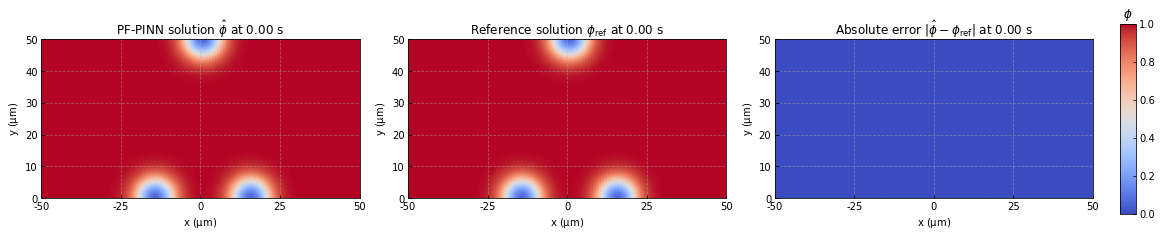

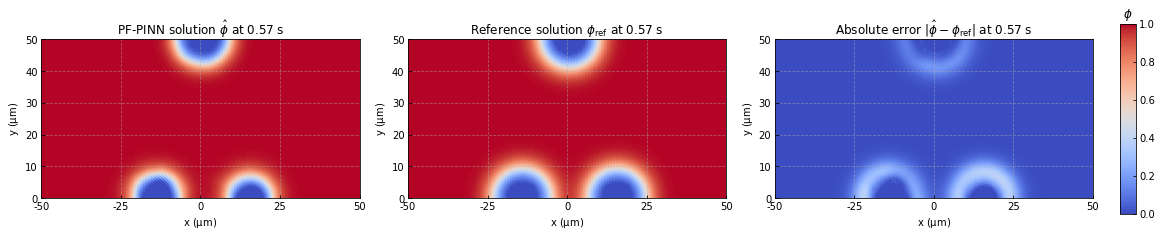

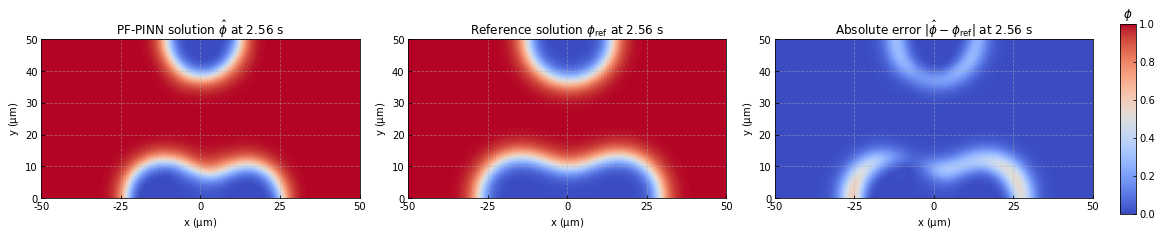

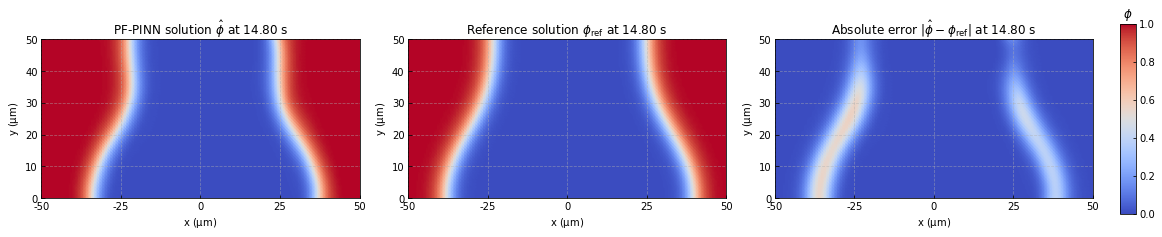

In [5]:
ts = [0.00, 0.57, 2.56, 14.80]
# ts = [ 49.15]
mesh_points = np.load("./data/2d-3pits/mesh_points.npy") * 1e4
# mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
mse = 0
for idx, tic in enumerate(ts):
    
    fig = plt.figure(figsize=(20, 3.5))
    
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    ax = fig.add_subplot(gs[0])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
    )
    
    truth = np.load("./data/2d-3pits/sol-" + f"{tic:.2f}.npy")
    # if np.abs(tic) < 1e-5:
    #     truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
    #                                  np.sqrt(2 * ALPHA_PHI) * \
    #                                 ( np.sqrt((np.abs(mesh_points[:, 0]) - 0.15)**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
    #     truth = np.vstack([truth_phi, truth_phi]).T
    
    diff = np.abs(truth[:, 0] - sol[:, 0])
    
    
    ax = fig.add_subplot(gs[1])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
    )
    
    ax = fig.add_subplot(gs[2])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, cmap='coolwarm', vmin=0, vmax=1)
    # ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
    )
    mse += np.mean(diff**2)
    ax_bar = fig.add_subplot(gs[3])
    fig.colorbar(ax.collections[0], cax=ax_bar)
    ax_bar.set_title(r'$\phi$', loc='center')
    plt.subplots_adjust(wspace=0.2)
    pos = ax_bar.get_position()
    ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
    # plt.savefig(save_root + f"2d-diffusion-2pits-baseline-fields-{idx}.png", dpi=300, bbox_inches='tight')
mse /= len(ts)
print(mse)

/tmp/ipykernel_1104/274215472.py:83: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax.collections[0], cax=ax_bar)


0.01042335405881177


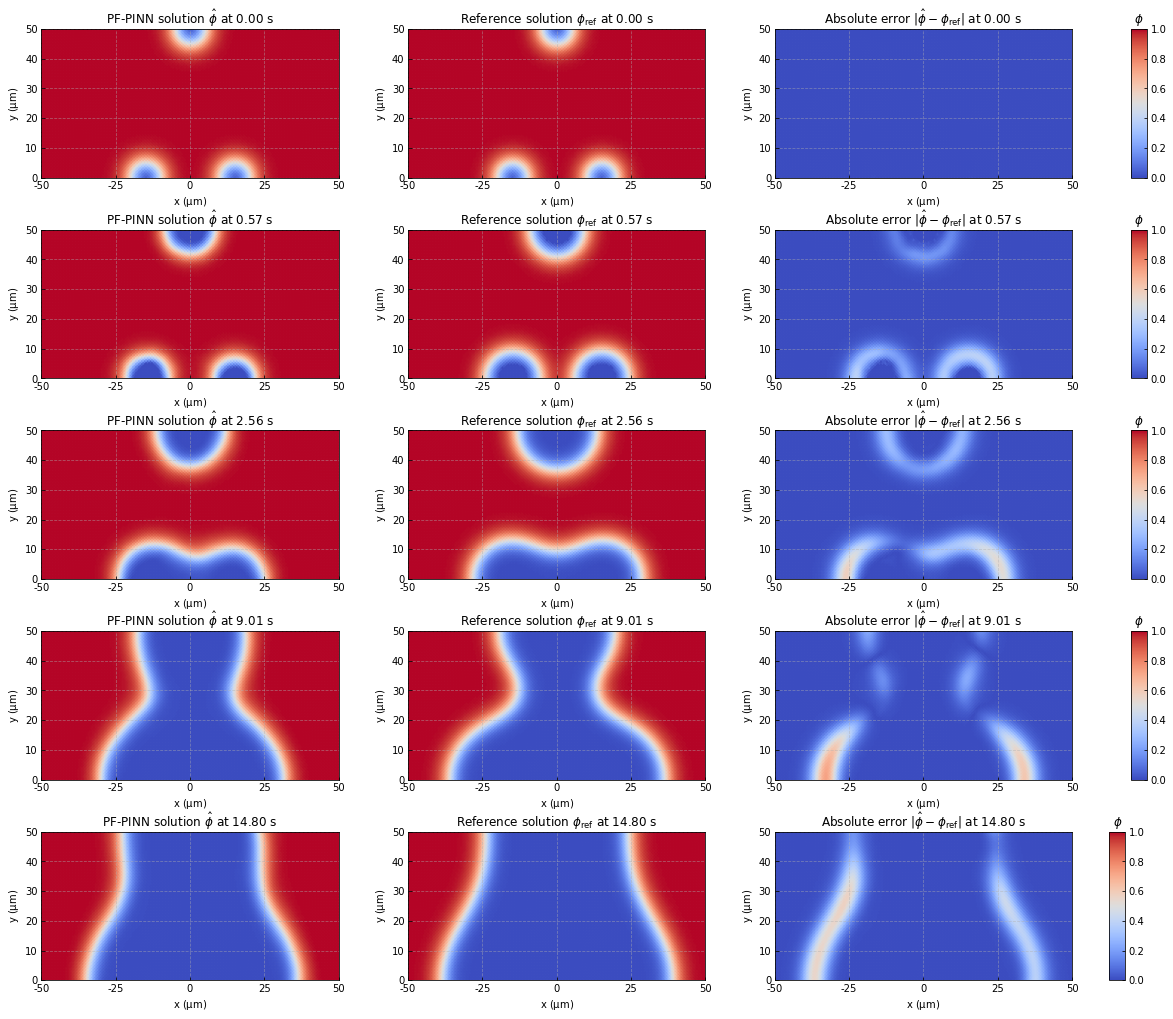

In [12]:
ts = [0.00, 0.57, 2.56, 9.01, 14.80]
# ts = [ 49.15]
# mesh_points = np.load("./data/2d/mesh_points.npy") * 1e4
# mesh_points = mesh_points[mesh_points[:, 1] < 0.5 & np.abs()]
mse = 0
import matplotlib
# matplotlib.use('Agg')



# for epoch in range(0, 280000, 2000):

fig = plt.figure(figsize=(20, 3.5*len(ts)))

gs = gridspec.GridSpec(len(ts), 4, width_ratios=[1, 1, 1, 0.05], hspace=0.35, )
# print(epoch)
# path = f"runs/2pits-models/2pits-models-every-epoch/2024-06-02-19-10-20/model-{epoch}.pt"
# state_dict = torch.load(path)

# # Create a new state dict with the correct keys
# new_state_dict = {}
# for key, value in state_dict.items():
#     # Replace 'layer' with 'linear' in the keys
#     new_key = key.replace('layer', 'linear')
#     new_state_dict[new_key] = value

# # Load the new state dict into the network
# net.load_state_dict(new_state_dict)

for idx, tic in enumerate(ts):
    
    
    tic_tensor = torch.ones(mesh_points.shape[0], 1).view(-1, 1) * tic * 1e-2
    mesh_tensor = torch.from_numpy(mesh_points).float()
    geotime = torch.cat([mesh_tensor, tic_tensor], dim=1).to(net.device)
    with torch.no_grad():
        sol = net(geotime).cpu().detach().numpy()

    ax = fig.add_subplot(gs[idx, 0])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=sol[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"PF-PINN solution $\hat\phi$" + " at "+ f"{tic:.2f} s"
    )
    
    
    truth = np.load("./data/2d-3pits/sol-" + f"{tic:.2f}.npy")
    # if np.abs(tic) < 1e-5:
    #     truth_phi = 1 - (1 - np.tanh(np.sqrt(OMEGA_PHI) /
    #                                 np.sqrt(2 * ALPHA_PHI) * \
    #                                 ( np.sqrt((np.abs(mesh_points[:, 0]) - 0.15)**2 + mesh_points[:, 1]**2) -0.05) / 1e4)) / 2
    #     truth = np.vstack([truth_phi, truth_phi]).T
    
    diff = np.abs(truth[:, 0] - sol[:, 0])
    
    ax = fig.add_subplot(gs[idx, 1])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=truth[:, 0], s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Reference solution $\phi_{\mathrm{ref}}$" + " at "+ f"{tic:.2f} s" 
    )

    ax = fig.add_subplot(gs[idx, 2])
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], c=diff, s=5, cmap='coolwarm', vmin=0, vmax=1)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x*1e2:.0f}'))
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.set(
        xlabel="x " + r"$\mathrm{(\mu m)}$", ylabel="y " + r"$\mathrm{(\mu m)}$", aspect='equal',
        xlim=(-0.5, 0.5), ylim=(0, 0.5),
        title=r"Absolute error $|\hat\phi - \phi_{\mathrm{ref}}|$" + " at "+ f"{tic:.2f} s" 
    )
    mse += np.mean(diff**2)
    ax_bar = fig.add_subplot(gs[idx, 3])
    fig.colorbar(ax.collections[0], cax=ax_bar)
    ax_bar.set_title(r'$\phi$', loc='center')
    plt.subplots_adjust(wspace=0.2)
    pos = ax_bar.get_position()
    ax_bar.set_position([pos.x0 - 0.015, pos.y0, pos.width, pos.height])
# plt.savefig(f"./figures/2d2pits-every-epoch/{epoch}.png", dpi=300, bbox_inches='tight')
mse /= len(ts)
print(mse)
plt.savefig("out.png", dpi=300, bbox_inches="tight")